In [1]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
from linares_plot import *
import os
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind
import scipy
from scikits.bootstrap import ci 


#data_psychophysics_corrected
data = pd.read_csv('C:\\Users\\David\\Dropbox\\IDIBAPS\\my code\\Project 1 (master thesis)\\idibaps_psychophysics')
df=data.loc[(data['type']==1) | (data['type']==2)]


2403


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


Outliers in 1 = 2, limit=3.79cm
Outliers in 2 = 4, limit=2.92cm
Outliers in 3 = 5, limit=3.18cm
Outliers in 4 = 1, limit=2.81cm
Outliers in 5 = 9, limit=2.41cm
Outliers in 6 = 6, limit=5.03cm
Outliers in 7 = 6, limit=3.33cm
Outliers in 8 = 7, limit=2.93cm
Outliers in 9 = 7, limit=3.96cm
Outliers in 10 = 4, limit=4.12cm
Outliers in 11 = 6, limit=4.49cm
Outliers in 12 = 4, limit=3.21cm
Outliers in 13 = 7, limit=3.33cm
Outliers in 14 = 5, limit=3.59cm
Outliers in 15 = 4, limit=3.5cm
Outliers in 16 = 4, limit=4.16cm
Outliers in 17 = 8, limit=3.32cm
Outliers in 18 = 7, limit=4.54cm
2307


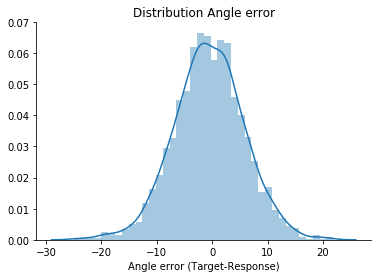

NormaltestResult(statistic=18.13955562885638, pvalue=0.0001150921076113315)

In [2]:
print(len(df))

def mod(target,report,radius_t, radius_r):
    #units given in degrees and cm
    y_t=np.array(radius_t*np.sin(np.radians(target)),dtype=np.float)
    x_t=np.array(radius_t*np.cos(np.radians(target)),dtype=np.float)
    y_r=np.array(radius_r*np.sin(np.radians(report)),dtype=np.float)
    x_r=np.array(radius_r*np.cos(np.radians(report)),dtype=np.float)
    m = np.sqrt((x_t - x_r)**2 + (y_t - y_r)**2)
    return m


modules = [round(mod(df.loc[i,'A_T'], df.loc[i,'A_R'], df.loc[i,'r_T'], df.loc[i,'r_R']),3) for i in df.index]
df['modules']=modules


from pandas import concat
frames=[]
for group_label in df.subject.unique():
    sub_group=df.groupby('subject').get_group(group_label)
    #CI
    #interval = sub_group.quantile([0.025, 0.975]).unstack(level=1)['A_err']
    #removed_out = sub_group.loc[(sub_group['A_err']>interval.iloc[0]) & (sub_group['A_err']<interval.iloc[1])] 
    #
    #Quartiles
    limit=sub_group['modules'].mean() + 2*sub_group['modules'].std()
    #print(round(limit,2))
    removed_out =sub_group.loc[sub_group['modules']<limit  ]
    
    
    frames.append(removed_out)
    
    #Print the result
    before_outliers=len(sub_group)
    after_outliers=len(removed_out)
    print( 'Outliers in ' + str(group_label) + ' = ' +str(before_outliers-after_outliers) + ', limit=' +str(round(limit,2))  + 'cm')
    


df = concat(frames)
print(len(df))

### Distribution A_Err in cw-ccw
sns.distplot(df['A_err'])
plt.title('Distribution Angle error')
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('Angle error (Target-Response)')
plt.show()

scipy.stats.normaltest(df['A_err'])

In [3]:

# #take off outliers per group
# def remove_outlier(df_in, col_name):
#     q1 = df_in[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out



# from pandas import concat
# frames=[]
# for group_label in df.subject.unique():
#     sub_group=df.groupby('subject').get_group(group_label)
#     #CI
#     #interval = sub_group.quantile([0.025, 0.975]).unstack(level=1)
#     #removed_out = sub_group.loc[(sub_group[column_names[column]]>interval[0]) & (sub_group[column_names[column]]<interval[1])] 
#     #
#     #Quartiles
#     removed_out = remove_outlier(sub_group, 'A_err' )
    
    
#     frames.append(removed_out)
    
#     #Print the result
#     before_outliers=len(sub_group)
#     after_outliers=len(removed_out)
#     print( 'Outliers in ' + str(group_label) + ' = ' +str(before_outliers-after_outliers) )
    


# df = concat(frames)
# len(df)

# ### Distribution A_Err in cw-ccw
# sns.distplot(df['A_err'])
# plt.title('Distribution Angle error')
# plt.legend(frameon=False)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().get_xaxis().tick_bottom()
# plt.gca().get_yaxis().tick_left()
# plt.xlabel('Angle error (Target-Response)')
# plt.show()

In [4]:
# df=df[df['A_err']<15]
# df=df[df['A_err']>-15]
# len(df)

In [5]:
## Functions to use

def circ_dist(a1,a2):
    ## Returns the minimal distance in angles between to angles 
    op1=abs(a2-a1)
    angs=[a1,a2]
    op2=min(angs)+(360-max(angs))
    options=[op1,op2]
    return min(options)



def get_quadrant(angle): 
    #angle in degrees, return the quadrant which it belongs to
    if angle>=0 and angle<=90:
        Q=1
    elif angle>90 and angle<=180:
        Q=2
    elif angle>180 and angle<=270:
        Q=3
    elif angle>270 and angle<=360:
        Q=4
    
    return Q


def cw_ccw_detector(target, NT):
    #print [target, NT,get_quadrant(target),get_quadrant(NT) ]
    #it returns the relative position of the target respect the NT
    if abs(target-NT)<180:
        if target<NT: 
            o='cw'
        else: 
            o='ccw'
    else:
        if target<NT: 
            o='ccw'
        else: 
            o='cw'
    #Ecceptions
    if [get_quadrant(target),get_quadrant(NT) ] == [1,4] : o= 'ccw'
    if [get_quadrant(target),get_quadrant(NT) ] == [4,1] : o= 'cw'
    
    return o


    

In [6]:
#Add necessary column
orients=[]
for i in range(0, len(df)):
    orients.append(cw_ccw_detector(df['A_T'].iloc[i], df['A_NT'].iloc[i]))

    
df['cw_ccw']=orients
df['dist_T_NT']=abs(df['A_T']-df['A_NT'])


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


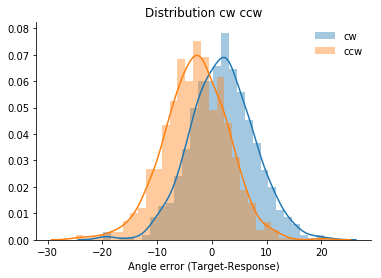

1.867354726799653
-2.95973136915078
NormaltestResult(statistic=9.45504941429977, pvalue=0.008848346202931415)
NormaltestResult(statistic=19.822820744984313, pvalue=4.9605424142929644e-05)


Ttest_indResult(statistic=19.707611629808277, pvalue=4.992748465869927e-80)

In [7]:
### Distribution A_Err in cw-ccw
sns.distplot(df.loc[df['cw_ccw']=='cw', 'A_err'], label='cw')
sns.distplot(df.loc[df['cw_ccw']=='ccw', 'A_err'], label='ccw')
plt.title('Distribution cw ccw')
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('Angle error (Target-Response)')
plt.show()

print(df.loc[df['cw_ccw']=='cw', 'A_err'].mean())
print(df.loc[df['cw_ccw']=='ccw', 'A_err'].mean())


print(scipy.stats.normaltest(df.loc[df['cw_ccw']=='cw', 'A_err']) )
print(scipy.stats.normaltest(df.loc[df['cw_ccw']=='ccw', 'A_err']) )


scipy.stats.ttest_ind(df.loc[df['cw_ccw']=='cw', 'A_err'], df.loc[df['cw_ccw']=='ccw', 'A_err'] )


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


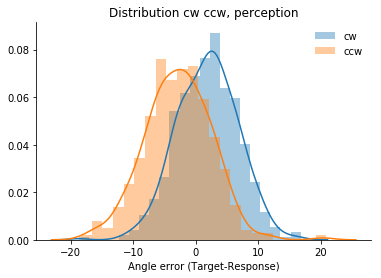

1.8626758147512865
-2.7753872053872053
NormaltestResult(statistic=2.8565178586489095, pvalue=0.23972593891307378)
NormaltestResult(statistic=11.451490890089552, pvalue=0.0032609215319256007)
Ttest_indResult(statistic=15.605651765028728, pvalue=4.8828416410698655e-50)


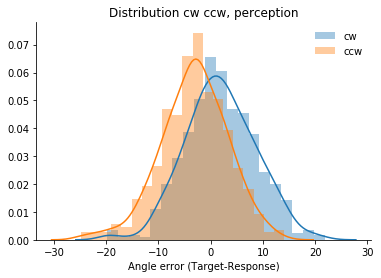

1.8721403508771932
-3.155267857142857
NormaltestResult(statistic=0.8932603054766621, pvalue=0.6397804855840317)
NormaltestResult(statistic=12.469346748750118, pvalue=0.0019602693839852)
Ttest_indResult(statistic=12.797064699207525, pvalue=4.134460090828227e-35)


In [8]:
### Distribution A_Err in cw-ccw in perception
sns.distplot(df.loc[(df['cw_ccw']=='cw') & (df['delay']==0) , 'A_err'], label='cw')
sns.distplot(df.loc[(df['cw_ccw']=='ccw') & (df['delay']==0) , 'A_err'], label='ccw')
plt.title('Distribution cw ccw, perception')
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('Angle error (Target-Response)')
plt.show()

print(df.loc[(df['cw_ccw']=='cw') & (df['delay']==0) , 'A_err'].mean())
print(df.loc[(df['cw_ccw']=='ccw') & (df['delay']==0) , 'A_err'].mean())


print(scipy.stats.normaltest(df.loc[(df['cw_ccw']=='cw') & (df['delay']==0) , 'A_err']) )
print(scipy.stats.normaltest(df.loc[(df['cw_ccw']=='ccw') & (df['delay']==0) , 'A_err']) )


print (scipy.stats.ttest_ind(df.loc[(df['cw_ccw']=='cw') & (df['delay']==0) , 'A_err'], 
                      df.loc[(df['cw_ccw']=='ccw') & (df['delay']==0) , 'A_err'] ) )



### Distribution A_Err in cw-ccw in perception
sns.distplot(df.loc[(df['cw_ccw']=='cw') & (df['delay']==3) , 'A_err'], label='cw')
sns.distplot(df.loc[(df['cw_ccw']=='ccw') & (df['delay']==3) , 'A_err'], label='ccw')
plt.title('Distribution cw ccw, perception')
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('Angle error (Target-Response)')
plt.show()

print(df.loc[(df['cw_ccw']=='cw') & (df['delay']==3) , 'A_err'].mean())
print(df.loc[(df['cw_ccw']=='ccw') & (df['delay']==3) , 'A_err'].mean())


print(scipy.stats.normaltest(df.loc[(df['cw_ccw']=='cw') & (df['delay']==3) , 'A_err']) )
print(scipy.stats.normaltest(df.loc[(df['cw_ccw']=='ccw') & (df['delay']==3) , 'A_err']) )


print( scipy.stats.ttest_ind(df.loc[(df['cw_ccw']=='cw') & (df['delay']==3) , 'A_err'], 
                      df.loc[(df['cw_ccw']=='ccw') & (df['delay']==3) , 'A_err'] ) )





C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


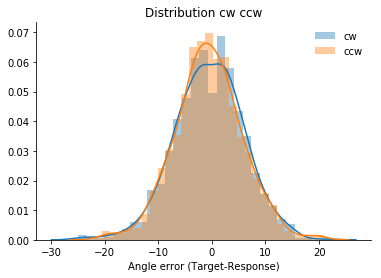

-0.49667823070251516
-0.5977469670710572


Ttest_indResult(statistic=0.38173797083484234, pvalue=0.7026909196605053)

In [9]:
### Shuffle 
import random

a=np.array(df['cw_ccw'].values)
random.shuffle(a)
df['cw_ccw_shuff'] = a


sns.distplot(df.loc[df['cw_ccw_shuff']=='cw', 'A_err'], label='cw')
sns.distplot(df.loc[df['cw_ccw_shuff']=='ccw', 'A_err'], label='ccw')
plt.title('Distribution cw ccw')
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('Angle error (Target-Response)')
plt.show()


print(df.loc[df['cw_ccw_shuff']=='cw', 'A_err'].mean())
print(df.loc[df['cw_ccw_shuff']=='ccw', 'A_err'].mean())

scipy.stats.ttest_ind(df.loc[df['cw_ccw_shuff']=='cw', 'A_err'], df.loc[df['cw_ccw_shuff']=='ccw', 'A_err'] )


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2403
Outliers in 1 = 2, limit=3.79cm
Outliers in 2 = 4, limit=2.92cm
Outliers in 3 = 5, limit=3.18cm
Outliers in 4 = 1, limit=2.81cm
Outliers in 5 = 9, limit=2.41cm
Outliers in 6 = 6, limit=5.03cm
Outliers in 7 = 6, limit=3.33cm
Outliers in 8 = 7, limit=2.93cm
Outliers in 9 = 7, limit=3.96cm
Outliers in 10 = 4, limit=4.12cm
Outliers in 11 = 6, limit=4.49cm
Outliers in 12 = 4, limit=3.21cm
Outliers in 13 = 7, limit=3.33cm
Outliers in 14 = 5, limit=3.59cm
Outliers in 15 = 4, limit=3.5cm
Outliers in 16 = 4, limit=4.16cm
Outliers in 17 = 8, limit=3.32cm
Outliers in 18 = 7, limit=4.54cm
2307


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


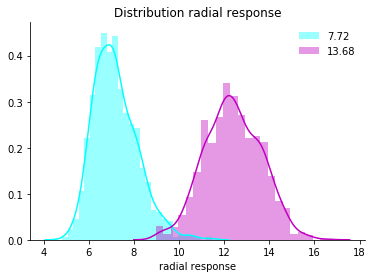

In [10]:
dfr=data.loc[(data['type']==1) | (data['type']==2)]

in_out=[]
### in --> the target is closer to fixation
### out --> the target is far from fixation

for i in dfr.index:
    if dfr.loc[i, 'r_T']<dfr.loc[i, 'r_NT']:
        in_out.append('in')
    else:
        in_out.append('out')


dfr['in_out'] = in_out


print(len(dfr))

def mod(target,report,radius_t, radius_r):
    #units given in degrees and cm
    y_t=np.array(radius_t*np.sin(np.radians(target)),dtype=np.float)
    x_t=np.array(radius_t*np.cos(np.radians(target)),dtype=np.float)
    y_r=np.array(radius_r*np.sin(np.radians(report)),dtype=np.float)
    x_r=np.array(radius_r*np.cos(np.radians(report)),dtype=np.float)
    m = np.sqrt((x_t - x_r)**2 + (y_t - y_r)**2)
    return m


modules = [round(mod(dfr.loc[i,'A_T'], dfr.loc[i,'A_R'], dfr.loc[i,'r_T'], dfr.loc[i,'r_R']),3) for i in dfr.index]
dfr['modules']=modules


from pandas import concat
frames=[]
for group_label in dfr.subject.unique():
    sub_group=dfr.groupby('subject').get_group(group_label)
    #CI
    #interval = sub_group.quantile([0.025, 0.975]).unstack(level=1)['A_err']
    #removed_out = sub_group.loc[(sub_group['A_err']>interval.iloc[0]) & (sub_group['A_err']<interval.iloc[1])] 
    #
    #Quartiles
    limit=sub_group['modules'].mean() + 2*sub_group['modules'].std()
    #print(round(limit,2))
    removed_out =sub_group.loc[sub_group['modules']<limit  ]
    
    
    frames.append(removed_out)
    
    #Print the result
    before_outliers=len(sub_group)
    after_outliers=len(removed_out)
    print( 'Outliers in ' + str(group_label) + ' = ' +str(before_outliers-after_outliers) + ', limit=' +str(round(limit,2))  + 'cm')
    


dfr = concat(frames)
print(len(dfr))

### Distribution A_Err in cw-ccw
sns.distplot(dfr.loc[ dfr['r_T']==7.72, 'r_R'], color='cyan', label='7.72')
#sns.distplot(dfr.loc[ dfr['r_T']==10.7, 'r_R'], color='g', label='10.7')
sns.distplot(dfr.loc[ dfr['r_T']==13.68, 'r_R'], color='m', label='13.68')
plt.title('Distribution radial response')
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('radial response')
plt.show()


## Delays 0 and 3 in both radius

2307
2291


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


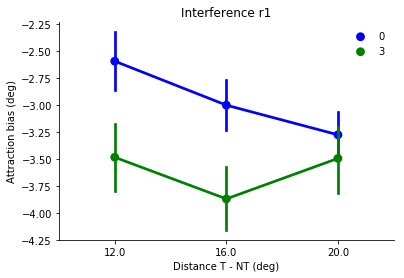

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: distance_A_err
No. Observations: 1189    Method:             REML          
No. Groups:       18      Scale:              11.4408       
Min. group size:  16      Likelihood:         -3167.7755    
Max. group size:  100     Converged:          Yes           
Mean group size:  66.1                                      
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept         -1.746    0.814 -2.146 0.032 -3.341 -0.151
dist_T_NT         -0.092    0.042 -2.173 0.030 -0.175 -0.009
delay             -0.711    0.326 -2.179 0.029 -1.350 -0.071
dist_T_NT:delay    0.031    0.020  1.529 0.126 -0.009  0.070
Group Var          3.326    0.357                           






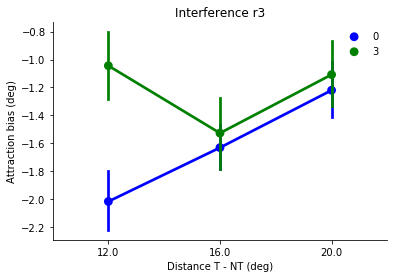

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: distance_A_err
No. Observations: 1102    Method:             REML          
No. Groups:       18      Scale:              6.7656        
Min. group size:  15      Likelihood:         -2649.0479    
Max. group size:  91      Converged:          Yes           
Mean group size:  61.2                                      
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept         -3.322    0.638 -5.207 0.000 -4.573 -2.072
dist_T_NT          0.099    0.034  2.946 0.003  0.033  0.165
delay              0.741    0.261  2.837 0.005  0.229  1.253
dist_T_NT:delay   -0.037    0.016 -2.330 0.020 -0.069 -0.006
Group Var          1.947    0.273                           



In [11]:
##### DISTANCE TO MEAN OF CW AND CCW as a measure
means_cw={}

for Subj in df.subject.unique():
    d_subj = df.groupby('subject').get_group(Subj)
    for ori in ['cw', 'ccw']:
        for distance in df.dist_T_NT.unique():
            for radius in df.r_T.unique():
                for delay in df.delay.unique():
                    mean_cw = round(d_subj.loc[ (d_subj['cw_ccw']==ori)  & (d_subj['r_T']==radius)
                                               & (d_subj['dist_T_NT']==distance) & (d_subj['delay']==delay) ,'A_err'].mean(), 3)
                    
                    means_cw[str(Subj)  + '_' + str(radius) + '_' +str(distance) +'_'+ str(delay) + '_' +ori] = mean_cw
                

        
cw_ccw_distance=[]

for i in df.index:
    or_ = df.loc[i, 'cw_ccw']
    if or_ == 'cw':
        or_cont = 'ccw'
    elif or_ =='ccw':
        or_cont = 'cw' 
    else:
        print('Error')
    idx =  str(df.loc[i, 'subject'])+ '_' + str(df.loc[i, 'r_T']) + '_' +str(df.loc[i, 'dist_T_NT']) +'_' +str(df.loc[i, 'delay']) +'_'  + or_cont
    #
    if or_ == 'ccw':
        cw_ccw_distance.append(df.loc[i, 'A_err'] - means_cw[idx] )  
    elif or_ =='cw':
        cw_ccw_distance.append( means_cw[idx] - df.loc[i, 'A_err'])  
    else:
        print('Error')
    


df['distance_A_err'] = np.array(cw_ccw_distance)/2
print(len(df))

#Remove null
df=df[~df['distance_A_err'].isnull()]
print(len(df))


#### PLOT PERCEPTUAL INTERFERENCE

# distance_A_err
sns.pointplot(x='dist_T_NT', y='distance_A_err', hue='delay', hue_order=[0,3], ci=68, x_estimator=np.mean,
              palette=['b', 'g'], legend=False, data=df.loc[df['r_T']==7.72])

# plt.plot([-0.1,2.1], [0,0], 'k--')
plt.legend(frameon=False)
plt.title('Interference r1')
plt.xlabel('Distance T - NT (deg)')
plt.ylabel('Attraction bias (deg)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

dfr1 = df.loc[df['r_T']==7.72]
res_m = smf.mixedlm(formula='distance_A_err ~ dist_T_NT*delay', data=dfr1, groups=dfr1['subject']).fit()
print(res_m.summary())

print('')
print('')
print('')

sns.pointplot(x='dist_T_NT', y='distance_A_err', hue='delay', hue_order=[0,3], ci=68, x_estimator=np.mean,
              palette=['b', 'g'], legend=False, data=df.loc[df['r_T']==13.68])

# plt.plot([-0.1,2.1], [0,0], 'k--')
plt.legend(frameon=False)
plt.title('Interference r3')
plt.xlabel('Distance T - NT (deg)')
plt.ylabel('Attraction bias (deg)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

dfr3 = df.loc[df['r_T']==13.68]
res_m = smf.mixedlm(formula='distance_A_err ~ dist_T_NT*delay', data=dfr3, groups=dfr3['subject']).fit()
print(res_m.summary())

## Perceptual effects 

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


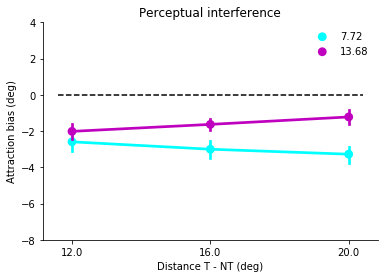

[0.09205386517755408, 5.016737100011929e-06, 1.866101968696445e-11]
           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: distance_A_err
No. Observations: 1169    Method:             REML          
No. Groups:       18      Scale:              6.7009        
Min. group size:  16      Likelihood:         -2806.6805    
Max. group size:  98      Converged:          Yes           
Mean group size:  64.9                                      
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept          0.388    1.452  0.267 0.789 -2.457  3.233
r_T               -0.275    0.127 -2.161 0.031 -0.524 -0.026
dist_T_NT         -0.329    0.086 -3.820 0.000 -0.497 -0.160
r_T:dist_T_NT      0.031    0.008  3.991 0.000  0.016  0.046
Group Var          2.519    0.349                           



In [12]:
sns.pointplot(x='dist_T_NT', y='distance_A_err', hue='r_T', hue_order=[7.72, 13.68], ci=95, x_estimator=np.mean,
              palette=['cyan', 'm'], legend=False, data=df.loc[df['delay']==0])

# plt.plot([-0.1,2.1], [0,0], 'k--')
plt.legend(frameon=False)
plt.title('Perceptual interference')
plt.xlabel('Distance T - NT (deg)')
plt.ylabel('Attraction bias (deg)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.plot([-0.1,2.1], [0,0], 'k--')
plt.ylim(-8,4)
plt.show()

p_values=[]
df_d0 = df.loc[df['delay']==0]
for dist in [12, 16, 20]:
    a= df_d0[(df_d0['r_T'] == 7.72 ) & (df_d0['dist_T_NT'] == dist) ]['distance_A_err']
    b= df_d0[(df_d0['r_T'] == 13.68 ) & (df_d0['dist_T_NT'] == dist) ]['distance_A_err']
    p_values.append(ttest_ind(a,b)[1])

print(p_values)

#### MODEL
res_m = smf.mixedlm(formula='distance_A_err ~ r_T * dist_T_NT', data=df_d0, groups=df_d0['subject']).fit()
print(res_m.summary())


           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: distance_A_err
No. Observations: 1169    Method:             REML          
No. Groups:       18      Scale:              6.7009        
Min. group size:  16      Likelihood:         -2806.6805    
Max. group size:  98      Converged:          Yes           
Mean group size:  64.9                                      
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept          0.388    1.452  0.267 0.789 -2.457  3.233
r_T               -0.275    0.127 -2.161 0.031 -0.524 -0.026
dist_T_NT         -0.329    0.086 -3.820 0.000 -0.497 -0.160
r_T:dist_T_NT      0.031    0.008  3.991 0.000  0.016  0.046
Group Var          2.519    0.349                           



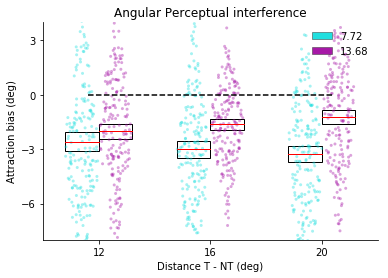

In [13]:
linares_plot(x='dist_T_NT', y='distance_A_err', hue='r_T', order=[12,16,20], hue_order=[7.72,13.68],
             alpha=0.4, palette=['cyan', 'm'], df=df.loc[df['delay']==0], point_size=3)
plt.plot([-0.1,2.1], [0,0], 'k--');
plt.ylim(-8,4);
plt.title('Angular Perceptual interference')
plt.xlabel('Distance T - NT (deg)');
plt.ylabel('Attraction bias (deg)');
plt.yticks([-6,-3, 0, 3]);

#### MODEL
res_m = smf.mixedlm(formula='distance_A_err ~ r_T * dist_T_NT', data=df_d0, groups=df_d0['subject']).fit()
print(res_m.summary())


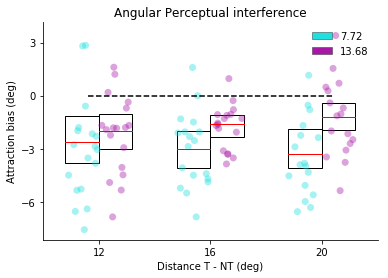

In [31]:
linares_plot(x='dist_T_NT', y='distance_A_err', hue='r_T', order=[12,16,20], hue_order=[7.72,13.68],
             alpha=0.4, palette=['cyan', 'm'], df=df.loc[df['delay']==0], point_size=7,  by_subj=True, subj_col='subject')
plt.plot([-0.1,2.1], [0,0], 'k--');
#plt.ylim(-8,4);
plt.title('Angular Perceptual interference')
plt.xlabel('Distance T - NT (deg)');
plt.ylabel('Attraction bias (deg)');
plt.yticks([-6,-3, 0, 3]);

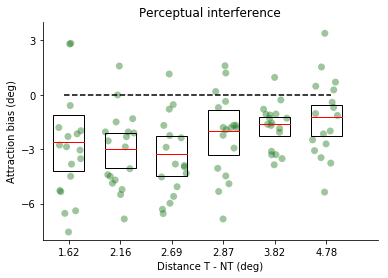

In [42]:
## Plot en funcion de distance
radians_distance = [round(df['r_T'].iloc[i] * np.radians(df['dist_T_NT'].iloc[i]),2) for i in range(len(df))]
df['radians_distance'] = radians_distance
df.radians_distance.unique()

linares_plot(x='radians_distance', y='distance_A_err', order=[1.62, 2.16, 2.69, 2.87, 3.82, 4.78], 
             alpha=0.4, palette=['green'], df=df.loc[df['delay']==0], point_size=7,  by_subj=True, subj_col='subject')
plt.plot([-0.1,5.1], [0,0], 'k--');
plt.ylim(-8,4);
plt.xlim(-0.5, 6)
plt.title('Perceptual interference');
plt.xlabel('Distance T - NT (deg)');
plt.ylabel('Attraction bias (deg)');
plt.yticks([-6,-3, 0, 3]);

In [43]:
res_m = smf.mixedlm(formula='distance_A_err ~  dist_T_NT', data=df_d0.loc[df_d0['r_T']==7.72], groups=df_d0.loc[df_d0['r_T']==7.72, 'subject']).fit()
print(res_m.summary())

res_m = smf.mixedlm(formula='distance_A_err ~  dist_T_NT', data=df_d0.loc[df_d0['r_T']==13.68], groups=df_d0.loc[df_d0['r_T']==13.68, 'subject']).fit()
print(res_m.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: distance_A_err
No. Observations: 599     Method:             REML          
No. Groups:       18      Scale:              7.4566        
Min. group size:  8       Likelihood:         -1478.2882    
Max. group size:  51      Converged:          Yes           
Mean group size:  33.3                                      
-------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-------------------------------------------------------------
Intercept     -1.765     0.722  -2.446  0.014  -3.180  -0.351
dist_T_NT     -0.089     0.034  -2.611  0.009  -0.157  -0.022
Group Var      3.762     0.504                               

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: distance_A_err
No. Observations: 570     Method:             REML          
No. Groups:       18      Scale:         

### Effect of delay 0 subject by subject

In [44]:
df.subject.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18], dtype=int64)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: distance_A_err
No. Observations: 1169    Method:             REML          
No. Groups:       18      Scale:              6.7009        
Min. group size:  16      Likelihood:         -2806.6805    
Max. group size:  98      Converged:          Yes           
Mean group size:  64.9                                      
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept          0.388    1.452  0.267 0.789 -2.457  3.233
r_T               -0.275    0.127 -2.161 0.031 -0.524 -0.026
dist_T_NT         -0.329    0.086 -3.820 0.000 -0.497 -0.160
r_T:dist_T_NT      0.031    0.008  3.991 0.000  0.016  0.046
Group Var          2.519    0.349                           



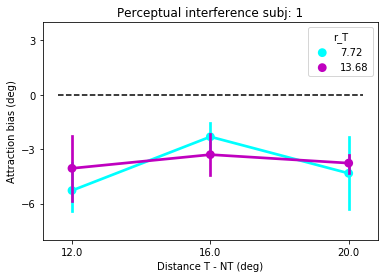

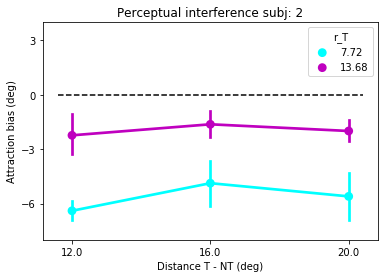

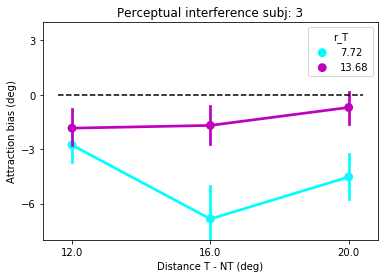

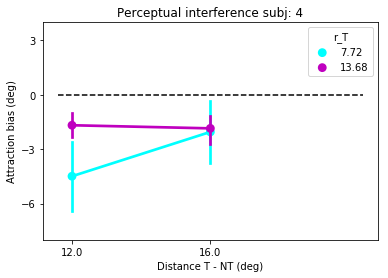

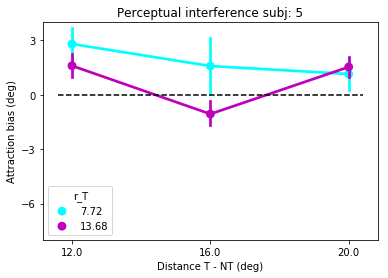

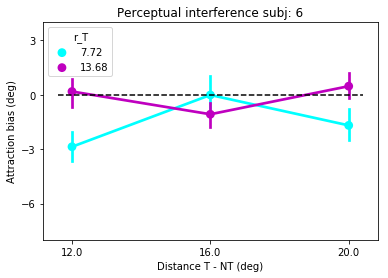

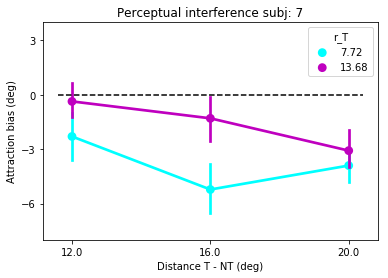

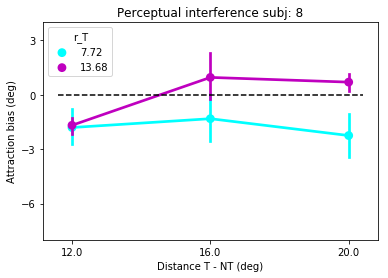

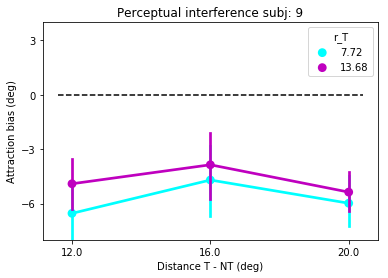

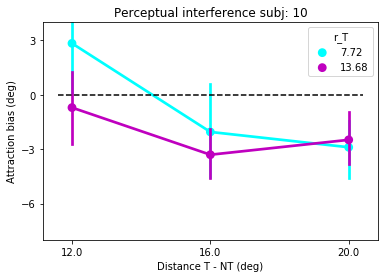

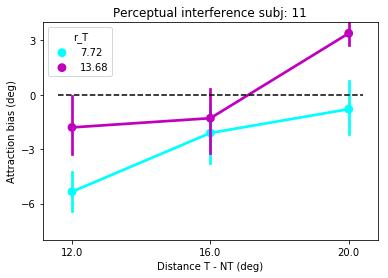

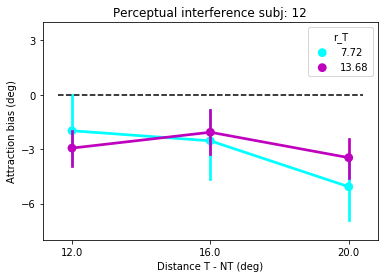

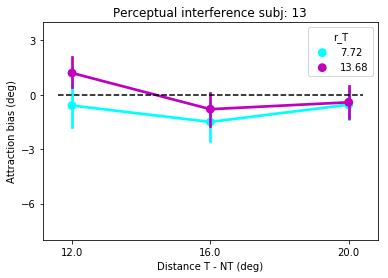

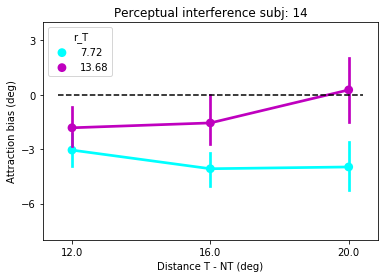

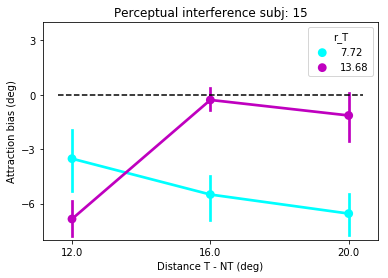

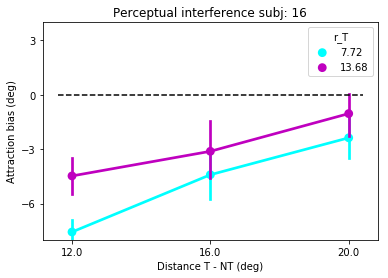

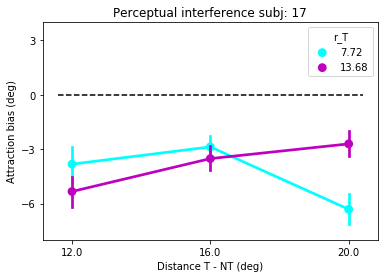

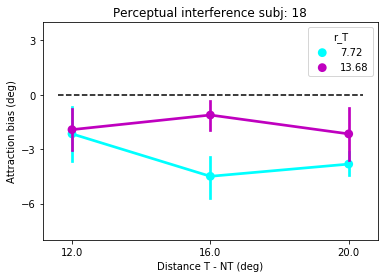

In [32]:
for subj in df.subject.unique():
    plt.figure()
    sns.pointplot(x='dist_T_NT', y='distance_A_err', hue='r_T', hue_order=[7.72, 13.68], ci=95, x_estimator=np.mean,
              palette=['cyan', 'm'], legend=False, data=df.loc[(df['delay']==0) & (df['subject']==subj)])
                  
    #linares_plot(x='dist_T_NT', y='distance_A_err', hue='r_T', order=[12,16,20], hue_order=[7.72,13.68],
    #             alpha=0.8, pallete=['cyan', 'm'], df=df.loc[(df['delay']==0) & (df['subject']==subj)], point_size=1.5)
    plt.plot([-0.1,2.1], [0,0], 'k--');
    plt.ylim(-8,4);
    plt.title('Perceptual interference subj: '  + str(subj) );
    plt.xlabel('Distance T - NT (deg)');
    plt.ylabel('Attraction bias (deg)');
    plt.yticks([-6,-3, 0, 3]);

    
#### MODEL
res_m = smf.mixedlm(formula='distance_A_err ~ r_T * dist_T_NT', data=df_d0, groups=df_d0['subject']).fit()
print(res_m.summary())

## Memory effects (raw)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


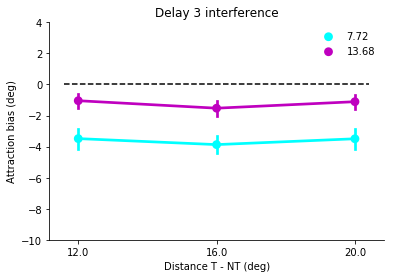

[1.9580585877251953e-09, 6.635174884334158e-09, 5.240009112923532e-09]
           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: distance_A_err
No. Observations: 1122    Method:             REML          
No. Groups:       18      Scale:              12.4061       
Min. group size:  15      Likelihood:         -3033.2603    
Max. group size:  93      Converged:          Yes           
Mean group size:  62.3                                      
------------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
------------------------------------------------------------
Intercept        -7.269    1.960 -3.709 0.000 -11.111 -3.428
r_T               0.452    0.176  2.570 0.010   0.107  0.797
dist_T_NT         0.021    0.118  0.180 0.857  -0.211  0.253
r_T:dist_T_NT    -0.003    0.011 -0.277 0.782  -0.024  0.018
Group Var         2.200    0.235                            



In [45]:
sns.pointplot(x='dist_T_NT', y='distance_A_err', hue='r_T', hue_order=[7.72, 13.68], ci=95, x_estimator=np.mean,
              palette=['cyan', 'm'], legend=False, data=df.loc[df['delay']==3])

# plt.plot([-0.1,2.1], [0,0], 'k--')
plt.legend(frameon=False)
plt.title('Delay 3 interference')
plt.xlabel('Distance T - NT (deg)')
plt.ylabel('Attraction bias (deg)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.plot([-0.1,2.1], [0,0], 'k--')
plt.ylim(-10,4)
plt.show()

p_values=[]
df_d3 = df.loc[df['delay']==3]
for dist in [12, 16, 20]:
    a= df_d3[(df_d3['r_T'] == 7.72 ) & (df_d3['dist_T_NT'] == dist) ]['distance_A_err']
    b= df_d3[(df_d3['r_T'] == 13.68 ) & (df_d3['dist_T_NT'] == dist) ]['distance_A_err']
    p_values.append(ttest_ind(a,b)[1])

print(p_values)

#### MODEL
res_m = smf.mixedlm(formula='distance_A_err ~ r_T * dist_T_NT', data=df_d3, groups=df_d3['subject']).fit()
print(res_m.summary())


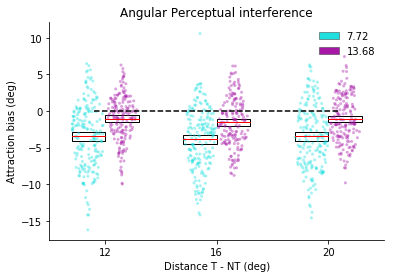

In [46]:
linares_plot(x='dist_T_NT', y='distance_A_err', hue='r_T', order=[12,16,20], hue_order=[7.72,13.68],
             alpha=0.4, palette=['cyan', 'm'], df=df.loc[df['delay']==3], point_size=3)
plt.plot([-0.1,2.1], [0,0], 'k--');
#plt.ylim(-8,4);
plt.title('Angular Perceptual interference')
plt.xlabel('Distance T - NT (deg)');
plt.ylabel('Attraction bias (deg)');


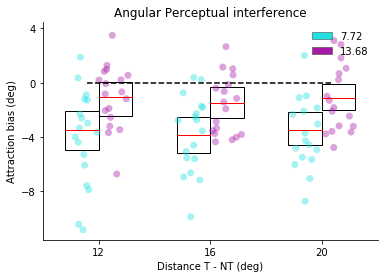

In [35]:
linares_plot(x='dist_T_NT', y='distance_A_err', hue='r_T', order=[12,16,20], hue_order=[7.72,13.68],
             alpha=0.4, palette=['cyan', 'm'], df=df.loc[df['delay']==3], point_size=7, by_subj=True, subj_col='subject')
plt.plot([-0.1,2.1], [0,0], 'k--');
#plt.ylim(-8,4);
plt.title('Angular Perceptual interference')
plt.xlabel('Distance T - NT (deg)');
plt.ylabel('Attraction bias (deg)');
plt.yticks([-8,-4, 0, 4]);

## General Model

In [47]:
## Mixed model (subject as random intercept)
res_m = smf.mixedlm(formula='distance_A_err ~ r_T * dist_T_NT*delay', data=df, groups=df['subject']).fit()
print(res_m.summary())


            Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: distance_A_err
No. Observations:   2291    Method:             REML          
No. Groups:         18      Scale:              9.6171        
Min. group size:    31      Likelihood:         -5893.2175    
Max. group size:    191     Converged:          Yes           
Mean group size:    127.3                                     
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.413    1.716  0.241 0.810 -2.950  3.777
r_T                 -0.276    0.152 -1.814 0.070 -0.575  0.022
dist_T_NT           -0.331    0.103 -3.210 0.001 -0.533 -0.129
r_T:dist_T_NT        0.031    0.009  3.344 0.001  0.013  0.050
delay               -2.572    0.796 -3.231 0.001 -4.133 -1.012
r_T:delay            0.243    0.072  3.349 0.001  0.101  0.385
dist_

## Memory 

#### take off perceptual effect (d3 - d0)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


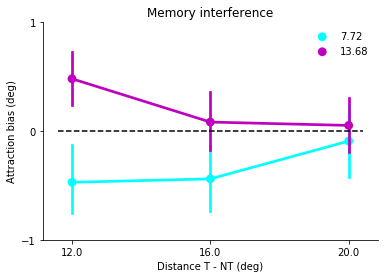

[6.968761461100693e-06, 0.012289307381032517, 0.4968561314413179]


In [48]:
#Measure d3-d0

d0={}

for Subj in df.subject.unique():
    d_subj = df.groupby('subject').get_group(Subj)
    for ori in ['cw', 'ccw']:
        for distance in df.dist_T_NT.unique():
            for radius in df.r_T.unique():
                mean_d0 = round(d_subj.loc[ (d_subj['cw_ccw']==ori)  & (d_subj['r_T']==radius)
                                           & (d_subj['dist_T_NT']==distance) & (d_subj['delay']==0) ,'distance_A_err'].mean(), 3)

                d0[str(Subj)  + '_' + str(radius) + '_' +str(distance) + '_' +ori] = mean_d0



dist_A_err_d3_d0=[]

for i in df.index:
    idx =  str(df.loc[i, 'subject'])+ '_' + str(df.loc[i, 'r_T']) + '_' +str(df.loc[i, 'dist_T_NT']) +'_'  + df.loc[i, 'cw_ccw']
    #
    dist_A_err_d3_d0.append(df.loc[i, 'distance_A_err'] - d0[idx] )

    


df['dist_A_err_d3_d0'] = dist_A_err_d3_d0

#### PLOT MEMORY INTERFERENCE

sns.pointplot(x='dist_T_NT', y='dist_A_err_d3_d0', hue='r_T', ci=95, x_estimator=np.mean,
              palette=['cyan', 'm'], legend=False, data=df)

plt.plot([-0.1,2.1], [0,0], 'k--')
plt.yticks([-1, 0, 1])
plt.legend(frameon=False)
plt.title('Memory interference')
plt.xlabel('Distance T - NT (deg)')
plt.ylabel('Attraction bias (deg)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

#p_values to compare a distance between two radius

p_values=[]
for dist in [12, 16, 20]:
    a= df[(df['r_T'] == 7.72 ) & (df['dist_T_NT'] == dist) ]['dist_A_err_d3_d0']
    b= df[(df['r_T'] == 13.68 ) & (df['dist_T_NT'] == dist) ]['dist_A_err_d3_d0']
    p_values.append(ttest_ind(a,b)[1])

print(p_values)


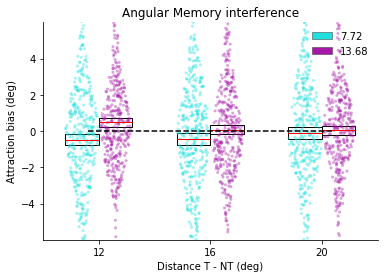

In [49]:
linares_plot(x='dist_T_NT', y='dist_A_err_d3_d0', hue='r_T', order=[12,16,20], hue_order=[7.72,13.68],
             alpha=0.4, palette=['cyan', 'm'], df=df, point_size=3)
plt.plot([-0.1,2.1], [0,0], 'k--');
plt.ylim(-6,6);
plt.title('Angular Memory interference')
plt.xlabel('Distance T - NT (deg)');
plt.ylabel('Attraction bias (deg)');
plt.yticks([-4, -2, 0, 2, 4]);



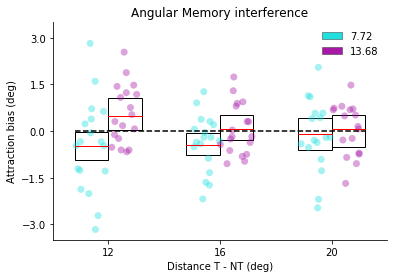

In [51]:
linares_plot(x='dist_T_NT', y='dist_A_err_d3_d0', hue='r_T', order=[12,16,20], hue_order=[7.72,13.68],
             alpha=0.4, palette=['cyan', 'm'], df=df, point_size=7,  by_subj=True, subj_col='subject')
plt.plot([-0.3, 2.3], [0,0], 'k--');
plt.title('Angular Memory interference')
plt.xlabel('Distance T - NT (deg)');
plt.ylabel('Attraction bias (deg)');
plt.yticks([ -3, -1.5,  0, 1.5, 3]);
plt.ylim(-3.5, 3.5);


In [52]:
#### MODEL
res_m = smf.mixedlm(formula='dist_A_err_d3_d0 ~ r_T * dist_T_NT', data=df, groups=df['subject']).fit()
print(res_m.summary())


            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: dist_A_err_d3_d0
No. Observations: 2291    Method:             REML            
No. Groups:       18      Scale:              8.2985          
Min. group size:  31      Likelihood:         -5694.3160      
Max. group size:  191     Converged:          Yes             
Mean group size:  127.3                                       
---------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------
Intercept       -3.869     1.113  -3.477  0.001  -6.050  -1.688
r_T              0.362     0.101   3.587  0.000   0.164   0.560
dist_T_NT        0.178     0.068   2.611  0.009   0.044   0.311
r_T:dist_T_NT   -0.017     0.006  -2.746  0.006  -0.029  -0.005
Group Var        0.139     0.026                               



1


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


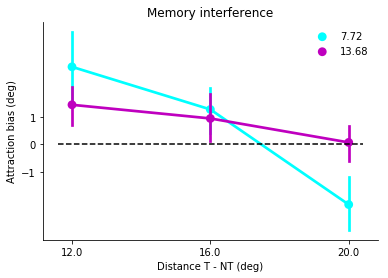

[0.38796965674479944, 0.8002186283334443, 0.09516212137794326]
2


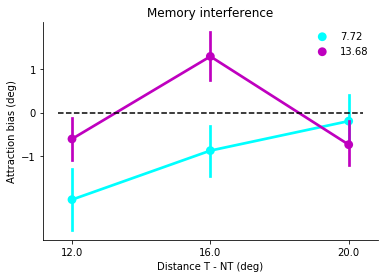

[0.13007903439012028, 0.010120205676486293, 0.5077480013121497]
3


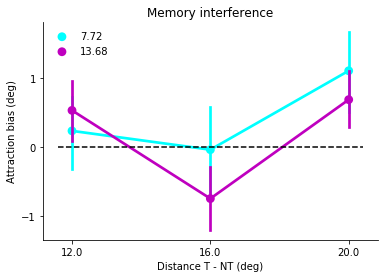

[0.673426429178176, 0.4097547560394772, 0.579562800480299]
4


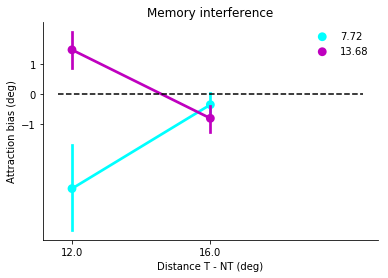

[0.01338992581369723, 0.5015055780154037, nan]
5


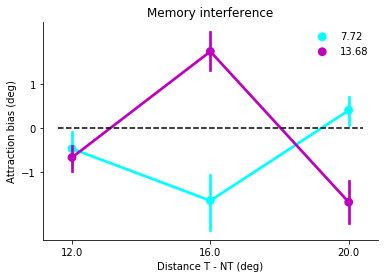

[0.7010758118113498, 4.338637940646074e-05, 0.0006569532648971651]
6


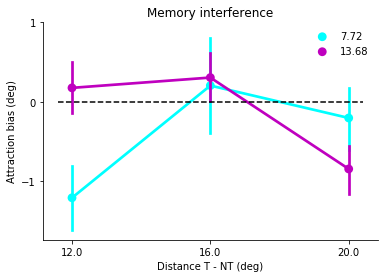

[0.015096079236995767, 0.8862144381231277, 0.21566068251018938]
7


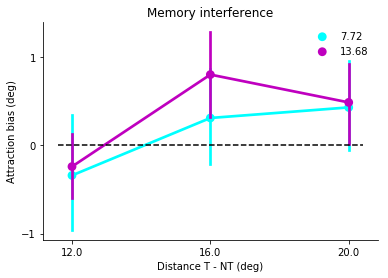

[0.8997190123945286, 0.5114119538826047, 0.9353471299895851]
8


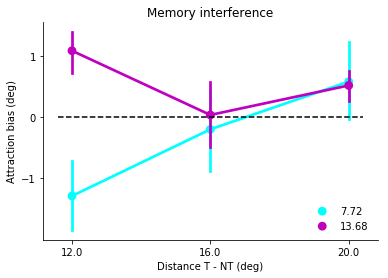

[0.0011655803542113272, 0.7875458815388736, 0.9319228785448526]
9


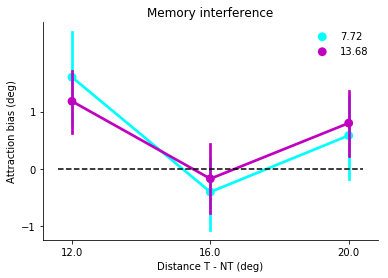

[0.6859568823737374, 0.803252445325757, 0.8252671347912911]
10


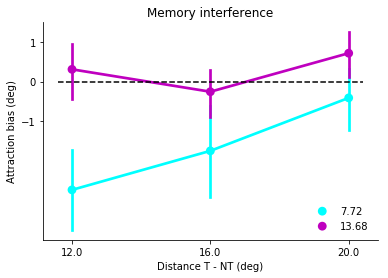

[0.023847503434807415, 0.24692573366752005, 0.2674804256460422]
11


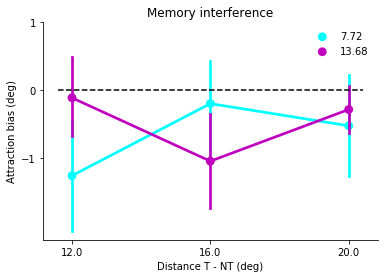

[0.2869597952764412, 0.4001185815059265, 0.8070877119890199]
12


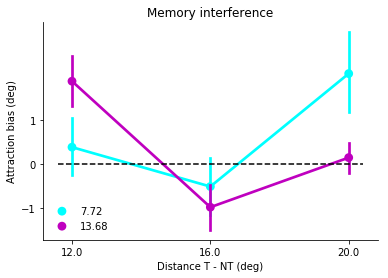

[0.10201479612853431, 0.600836954027919, 0.06300958254394301]
13


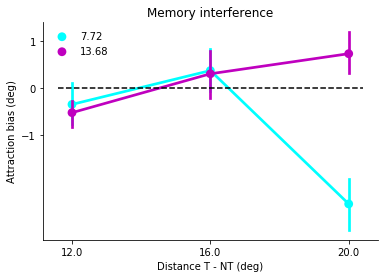

[0.7545672305637138, 0.9207626666564863, 3.0688201893222614e-05]
14


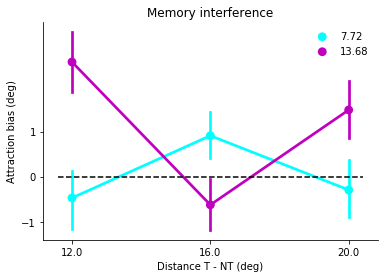

[0.0038603526056108367, 0.058086991984681674, 0.05281840434473303]
15


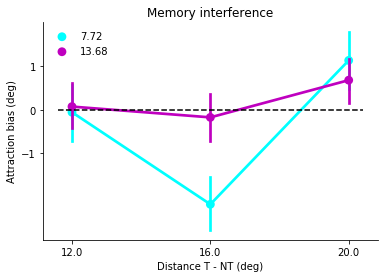

[0.8738832507419353, 0.021552826784040587, 0.5965558284845436]
16


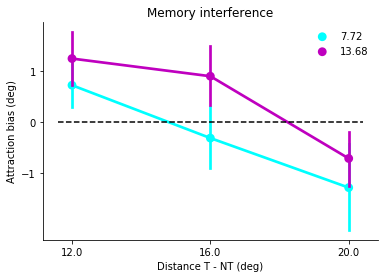

[0.438982956933614, 0.16107071343241308, 0.582245142632873]
17


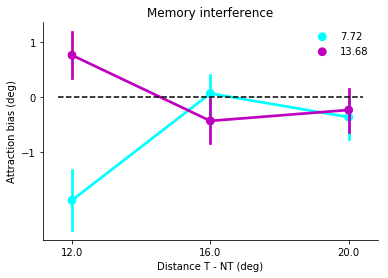

[0.0006077549041636213, 0.37112256219135853, 0.814204629937182]
18


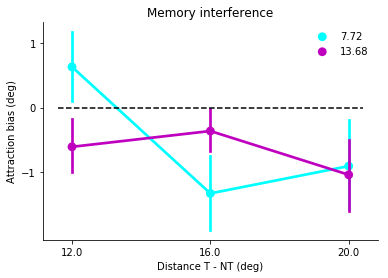

[0.09474701043683505, 0.17364420069063907, 0.8893879096620906]


In [249]:
#### PLOT MEMORY INTERFERENCE BY SUBJECT

for SUBJECT in df.subject.unique():
    print(SUBJECT)
    df1=df.loc[df['subject']==SUBJECT]   

    sns.pointplot(x='dist_T_NT', y='dist_A_err_d3_d0', hue='r_T', ci=68, x_estimator=np.mean,
                  palette=['cyan', 'm'], legend=False, data=df1)

    plt.plot([-0.1,2.1], [0,0], 'k--')
    plt.yticks([-1, 0, 1])
    plt.legend(frameon=False)
    plt.title('Memory interference')
    plt.xlabel('Distance T - NT (deg)')
    plt.ylabel('Attraction bias (deg)')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()
    plt.gca().get_yaxis().tick_left()
    plt.show()

    #p_values to compare a distance between two radius

    from scipy.stats import ttest_ind
    p_values=[]
    for dist in [12, 16, 20]:
        a= df1[(df1['r_T'] == 7.72 ) & (df1['dist_T_NT'] == dist) ]['dist_A_err_d3_d0']
        b= df1[(df1['r_T'] == 13.68 ) & (df1['dist_T_NT'] == dist) ]['dist_A_err_d3_d0']
        p_values.append(ttest_ind(a,b)[1])

    print(p_values)

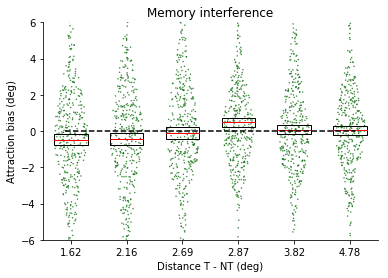

In [250]:
linares_plot(x='radians_distance', y='dist_A_err_d3_d0', order=[1.62, 2.16, 2.69, 2.87, 3.82, 4.78],
             alpha=0.8, palette=['green'], df=df, point_size=1.5)
plt.plot([-0.1,5.1], [0,0], 'k--');
plt.title('Memory interference');
plt.xlabel('Distance T - NT (deg)');
plt.ylabel('Attraction bias (deg)');
plt.ylim(-6,6);


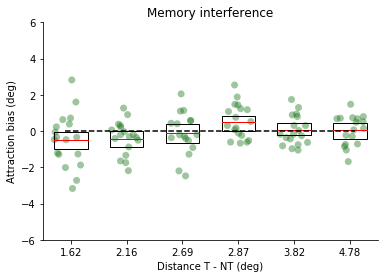

In [53]:
linares_plot(x='radians_distance', y='dist_A_err_d3_d0', order=[1.62, 2.16, 2.69, 2.87, 3.82, 4.78],
             alpha=0.4, palette=['green'], df=df, point_size=7, by_subj=True, subj_col='subject')
plt.plot([-0.1,5.1], [0,0], 'k--');
plt.title('Memory interference');
plt.xlabel('Distance T - NT (deg)');
plt.ylabel('Attraction bias (deg)');
plt.ylim(-6,6);

## Controls

In [54]:
df_cont=data.loc[data['type']==0]
df_cont.head()

,Unnamed: 0,r_T,r_NT,delay,type,A_T,A_NT,A_err,r_err,A_R,r_R,subject,session,Int_A_err,Int_r_err
0,0,13.68,NaN,0.0,0.0,314.0,NaN,-1.90,1.81,315.90,11.87,1,1,NaN,NaN
2,2,10.70,NaN,3.0,0.0,50.0,NaN,6.38,2.97,43.62,7.73,1,1,NaN,NaN
5,5,13.68,NaN,0.0,0.0,129.0,NaN,-10.73,0.62,139.73,13.06,1,1,NaN,NaN
6,6,13.68,NaN,3.0,0.0,304.0,NaN,4.01,0.96,299.99,12.72,1,1,NaN,NaN
7,7,13.68,NaN,3.0,0.0,215.0,NaN,-1.36,-1.49,216.36,15.17,1,1,NaN,NaN


3396


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


Outliers in 1 = 2, limit=2.81
Outliers in 2 = 8, limit=2.66
Outliers in 3 = 2, limit=4.03
Outliers in 4 = 1, limit=2.67
Outliers in 5 = 6, limit=2.33
Outliers in 6 = 5, limit=4.51
Outliers in 7 = 7, limit=2.53
Outliers in 8 = 10, limit=2.48
Outliers in 9 = 7, limit=3.48
Outliers in 10 = 10, limit=3.76
Outliers in 11 = 6, limit=4.06
Outliers in 12 = 2, limit=3.48
Outliers in 13 = 9, limit=2.41
Outliers in 14 = 9, limit=3.31
Outliers in 15 = 9, limit=2.46
Outliers in 16 = 11, limit=2.49
Outliers in 17 = 10, limit=2.79
Outliers in 18 = 7, limit=3.79
3275


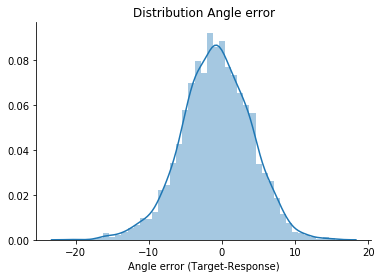

In [55]:
print(len(df_cont))

def mod(target,report,radius_t, radius_r):
    #units given in degrees and cm
    y_t=np.array(radius_t*np.sin(np.radians(target)),dtype=np.float)
    x_t=np.array(radius_t*np.cos(np.radians(target)),dtype=np.float)
    y_r=np.array(radius_r*np.sin(np.radians(report)),dtype=np.float)
    x_r=np.array(radius_r*np.cos(np.radians(report)),dtype=np.float)
    m = np.sqrt((x_t - x_r)**2 + (y_t - y_r)**2)
    return m


modules = [round(mod(df_cont.loc[i,'A_T'], df_cont.loc[i,'A_R'], df_cont.loc[i,'r_T'], df_cont.loc[i,'r_R']),3) for i in df_cont.index]
df_cont['modules']=modules


from pandas import concat
frames=[]
for group_label in df_cont.subject.unique():
    sub_group=df_cont.groupby('subject').get_group(group_label)
    #CI
    #interval = sub_group.quantile([0.025, 0.975]).unstack(level=1)['A_err']
    #removed_out = sub_group.loc[(sub_group['A_err']>interval.iloc[0]) & (sub_group['A_err']<interval.iloc[1])] 
    #
    #Quartiles
    limit=sub_group['modules'].mean() + 2*sub_group['modules'].std()
    #print(round(limit,2))
    removed_out =sub_group.loc[sub_group['modules']<limit  ]
    
    
    frames.append(removed_out)
    
    #Print the result
    before_outliers=len(sub_group)
    after_outliers=len(removed_out)
    print( 'Outliers in ' + str(group_label) + ' = ' +str(before_outliers-after_outliers) + ', limit=' +str(round(limit,2)) )
    


df_cont = concat(frames)
print(len(df_cont))

### Distribution A_Err in cw-ccw
sns.distplot(df_cont['A_err'])
plt.title('Distribution Angle error')
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('Angle error (Target-Response)')
plt.show()

3275
Outliers in 1 = 3, limit=2.67cm
Outliers in 2 = 2, limit=2.34cm
Outliers in 3 = 5, limit=3.06cm
Outliers in 4 = 1, limit=2.61cm
Outliers in 5 = 5, limit=2.09cm
Outliers in 6 = 4, limit=4.31cm
Outliers in 7 = 4, limit=2.31cm
Outliers in 8 = 11, limit=2.12cm
Outliers in 9 = 7, limit=3.2cm
Outliers in 10 = 3, limit=3.41cm
Outliers in 11 = 4, limit=3.63cm
Outliers in 12 = 7, limit=2.7cm
Outliers in 13 = 8, limit=2.19cm
Outliers in 14 = 6, limit=2.98cm
Outliers in 15 = 5, limit=2.18cm
Outliers in 16 = 4, limit=2.14cm
Outliers in 17 = 6, limit=2.45cm
Outliers in 18 = 5, limit=3.53cm
3185


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


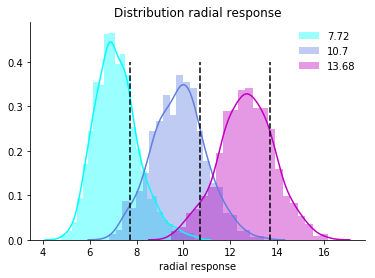

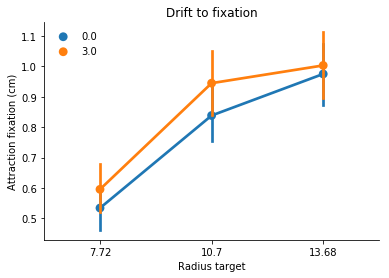

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err     
No. Observations: 3185    Method:             REML      
No. Groups:       18      Scale:              0.7171    
Min. group size:  67      Likelihood:         -4043.0423
Max. group size:  222     Converged:          Yes       
Mean group size:  176.9                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     -0.037    0.184 -0.203 0.839 -0.397  0.323
r_T            0.075    0.009  8.725 0.000  0.058  0.091
delay          0.029    0.045  0.643 0.520 -0.059  0.117
r_T:delay     -0.001    0.004 -0.138 0.890 -0.009  0.008
Group Var      0.448    0.184                           



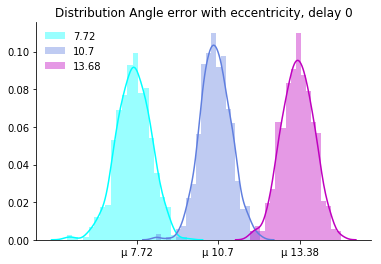

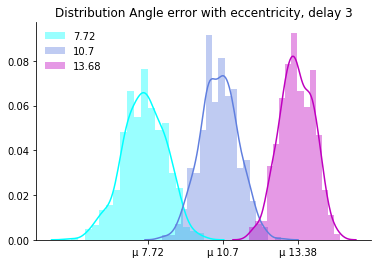

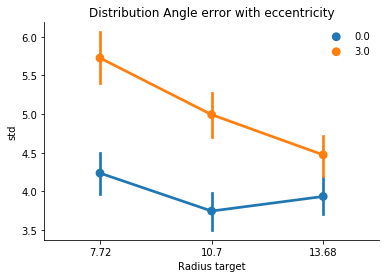

P_value in sensory =0.03143252532197971
P_value in memory =4.780239620185813e-06
P_value in r1 =0.0
P_value in r2 =0.0
P_value in r3 =0.0


In [56]:

dfr=df_cont.loc[df_cont['type']==0]

print(len(dfr))

def mod(target,report,radius_t, radius_r):
    #units given in degrees and cm
    y_t=np.array(radius_t*np.sin(np.radians(target)),dtype=np.float)
    x_t=np.array(radius_t*np.cos(np.radians(target)),dtype=np.float)
    y_r=np.array(radius_r*np.sin(np.radians(report)),dtype=np.float)
    x_r=np.array(radius_r*np.cos(np.radians(report)),dtype=np.float)
    m = np.sqrt((x_t - x_r)**2 + (y_t - y_r)**2)
    return m


modules = [round(mod(dfr.loc[i,'A_T'], dfr.loc[i,'A_R'], dfr.loc[i,'r_T'], dfr.loc[i,'r_R']),3) for i in dfr.index]
dfr['modules']=modules


from pandas import concat
frames=[]
for group_label in dfr.subject.unique():
    sub_group=dfr.groupby('subject').get_group(group_label)
    #CI
    #interval = sub_group.quantile([0.025, 0.975]).unstack(level=1)['A_err']
    #removed_out = sub_group.loc[(sub_group['A_err']>interval.iloc[0]) & (sub_group['A_err']<interval.iloc[1])] 
    #
    #Quartiles
    limit=sub_group['modules'].mean() + 2*sub_group['modules'].std()
    #print(round(limit,2))
    removed_out =sub_group.loc[sub_group['modules']<limit  ]
    
    
    frames.append(removed_out)
    
    #Print the result
    before_outliers=len(sub_group)
    after_outliers=len(removed_out)
    print( 'Outliers in ' + str(group_label) + ' = ' +str(before_outliers-after_outliers) + ', limit=' +str(round(limit,2))  + 'cm')
    


dfr = concat(frames)
print(len(dfr))



pallete=sns.blend_palette(['cyan', 'm'], 3)
pallete= np.array( [pallete[i][:3] for i in range(len(pallete))] )

### Distributionr err in radius
sns.distplot(dfr.loc[ dfr['r_T']==7.72, 'r_R'], color=list(pallete[0]),  label='7.72')
sns.distplot(dfr.loc[ dfr['r_T']==10.7, 'r_R'], color=list(pallete[1]),  label='10.7')
sns.distplot(dfr.loc[ dfr['r_T']==13.68, 'r_R'], color=list(pallete[2]),  label='13.68')
plt.title('Distribution radial response')
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('radial response')
plt.plot([7.72, 7.72], [0, 0.4], 'k--')
plt.plot([10.7, 10.7], [0, 0.4], 'k--')
plt.plot([13.68, 13.68], [0, 0.4], 'k--')
plt.show()


######

sns.pointplot(x='r_T', y='r_err', hue='delay', estimator=np.mean, legend=False, data=dfr)
plt.legend(frameon=False)
plt.title('Drift to fixation')
plt.xlabel('Radius target')
plt.ylabel('Attraction fixation (cm)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


#### MODEL
res_m = smf.mixedlm(formula='r_err ~ r_T * delay', data=dfr, groups=dfr['subject']).fit()
print(res_m.summary())



# ### Distributionr err in radius
# sns.distplot(dfr.loc[ dfr['r_T']==7.72, 'A_err'], color=list(pallete[0]),  label='7.72')
# sns.distplot(dfr.loc[ dfr['r_T']==10.7, 'A_err']+20, color=list(pallete[1]),  label='10.7')
# sns.distplot(dfr.loc[ dfr['r_T']==13.68, 'A_err']+40, color=list(pallete[2]),  label='13.68')
# plt.title('Distribution Angle error with eccentricity')
# plt.legend(frameon=False)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().get_xaxis().tick_bottom()
# plt.gca().get_yaxis().tick_left()
# plt.xlabel('')
# plt.xticks([0, 20, 40], ['µ 7.72', 'µ 10.7', 'µ 13.38'])
# plt.show()    



for delay in [0, 3]:
    plt.figure()
    sns.distplot(dfr.loc[ (dfr['r_T']==7.72) & (dfr['delay']==delay)   , 'A_err'], color=list(pallete[0]),  label='7.72')
    sns.distplot(dfr.loc[ (dfr['r_T']==10.7) & (dfr['delay']==delay) , 'A_err']+20, color=list(pallete[1]),  label='10.7')
    sns.distplot(dfr.loc[ (dfr['r_T']==13.68) & (dfr['delay']==delay) , 'A_err']+40, color=list(pallete[2]),  label='13.68')
    plt.title('Distribution Angle error with eccentricity, delay ' + str(delay))
    plt.legend(frameon=False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()
    plt.gca().get_yaxis().tick_left()
    plt.xlabel('')
    plt.xticks([0, 20, 40], ['µ 7.72', 'µ 10.7', 'µ 13.38'])
    plt.show()    



sns.pointplot(x='r_T', y='A_err', hue='delay', estimator=np.std, legend=False, data=dfr)
plt.legend(frameon=False)
plt.title('Distribution Angle error with eccentricity')
plt.xlabel('Radius target')
plt.ylabel('std')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

print('P_value in sensory =' + str(scipy.stats.levene(dfr.loc[ (dfr['r_T']==7.72) & (dfr['delay']==0 ), 'A_err'], dfr.loc[ (dfr['r_T']==10.7) & (dfr['delay']==0 ), 'A_err'], dfr.loc[ (dfr['r_T']==13.68) & (dfr['delay']==0 ), 'A_err'])[1]))
print('P_value in memory =' + str(scipy.stats.levene(dfr.loc[ (dfr['r_T']==7.72) & (dfr['delay']==3 ), 'A_err'], dfr.loc[ (dfr['r_T']==10.7) & (dfr['delay']==3 ), 'A_err'], dfr.loc[ (dfr['r_T']==13.68) & (dfr['delay']==3), 'A_err'])[1]))

print('P_value in r1 =' + str(scipy.stats.levene( dfr.loc[ (dfr['r_T']==7.72) & (dfr['delay']==0 ), 'A_err'], (dfr['r_T']==7.72) & (dfr['delay']==3 )        )[1]))
print('P_value in r2 =' + str(scipy.stats.levene( dfr.loc[ (dfr['r_T']==10.7) & (dfr['delay']==0 ), 'A_err'], (dfr['r_T']==10.7) & (dfr['delay']==3 )        )[1]))
print('P_value in r3 =' + str(scipy.stats.levene( dfr.loc[ (dfr['r_T']==13.68) & (dfr['delay']==0 ), 'A_err'], (dfr['r_T']==13.68) & (dfr['delay']==3 )        )[1]))





C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


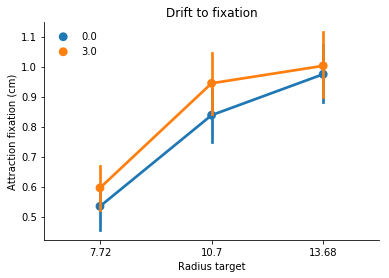

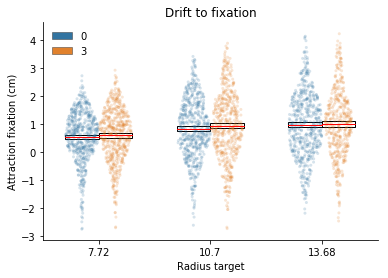

In [57]:
#Drift to fixation

sns.pointplot(x='r_T', y='r_err', hue='delay', estimator=np.mean, legend=False, data=dfr)
plt.legend(frameon=False)
plt.title('Drift to fixation')
plt.xlabel('Radius target')
plt.ylabel('Attraction fixation (cm)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


linares_plot(x='r_T', y='r_err', hue='delay', hue_order=[0,3], order=[7.72,10.7,13.68], df=dfr, 
            point_size=3, alpha=0.2, palette='tab10')
plt.legend(frameon=False)
plt.title('Drift to fixation')
plt.xlabel('Radius target')
plt.ylabel('Attraction fixation (cm)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



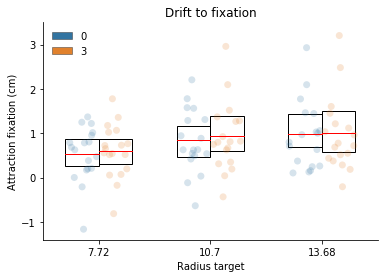

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err     
No. Observations: 3185    Method:             REML      
No. Groups:       18      Scale:              0.7171    
Min. group size:  67      Likelihood:         -4043.0423
Max. group size:  222     Converged:          Yes       
Mean group size:  176.9                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     -0.037    0.184 -0.203 0.839 -0.397  0.323
r_T            0.075    0.009  8.725 0.000  0.058  0.091
delay          0.029    0.045  0.643 0.520 -0.059  0.117
r_T:delay     -0.001    0.004 -0.138 0.890 -0.009  0.008
Group Var      0.448    0.184                           



In [58]:
linares_plot(x='r_T', y='r_err', hue='delay', hue_order=[0,3], order=[7.72,10.7,13.68], df=dfr, 
            point_size=7, alpha=0.2, palette='tab10', by_subj=True, subj_col='subject')
plt.legend(frameon=False)
plt.title('Drift to fixation')
plt.xlabel('Radius target')
plt.ylabel('Attraction fixation (cm)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

#### MODEL
res_m = smf.mixedlm(formula='r_err ~ r_T * delay', data=dfr, groups=dfr['subject']).fit()
print(res_m.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


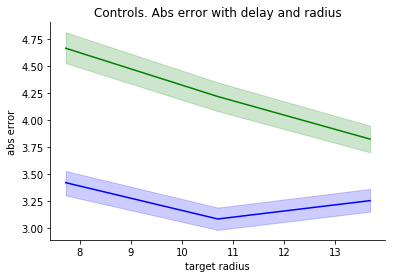

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: abs_err   
No. Observations: 1595    Method:             REML      
No. Groups:       18      Scale:              9.7507    
Min. group size:  34      Likelihood:         -4095.6406
Max. group size:  111     Converged:          Yes       
Mean group size:  88.6                                  
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      5.767    0.384 15.005 0.000  5.014  6.521
r_T           -0.142    0.032 -4.384 0.000 -0.206 -0.079
Group Var      0.421    0.057                           

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: abs_err   
No. Observations: 3275    Method:             REML      
No. Groups:       18      Scale:              7.7495    
Min. group size:  70      Likelihood:         -803

No handles with labels found to put in legend.


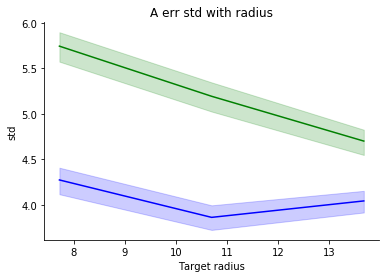

In [59]:

#Absolute error as a measure of precision
df_cont['abs_err']=abs(df_cont['A_err'].copy())

sns.lineplot(x='r_T', y='abs_err', hue='delay', hue_order=[0,3], ci=68, estimator=np.mean,
              palette=['b', 'g'], legend=False, data=df_cont)


plt.legend(frameon=False)
plt.title('Controls. Abs error with delay and radius')
plt.xlabel('target radius')
plt.ylabel('abs error')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


#### MODEL
res_m = smf.mixedlm(formula='abs_err ~ r_T', data=df_cont.loc[df_cont['delay']==3], groups=df_cont.loc[df_cont['delay']==3, 'subject']).fit()
print(res_m.summary())

res_m = smf.mixedlm(formula='abs_err ~ r_T*delay ', data=df_cont, groups=df_cont['subject']).fit()
print(res_m.summary())


#### With the std

sns.lineplot(x='r_T', y='A_err', hue='delay', hue_order=[0,3], ci=68, estimator=np.std,
              palette=['b', 'g'], legend=False, data=df_cont)

plt.legend(frameon=False)
plt.title('A err std with radius')
plt.xlabel('Target radius')
plt.ylabel('std')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()




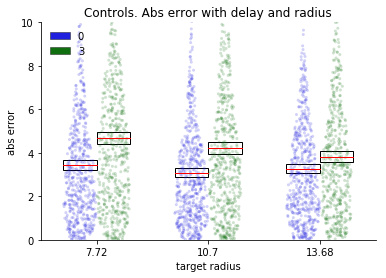

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: abs_err   
No. Observations: 3275    Method:             REML      
No. Groups:       18      Scale:              7.7495    
Min. group size:  70      Likelihood:         -8030.0091
Max. group size:  230     Converged:          Yes       
Mean group size:  181.9                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      3.577    0.348 10.283 0.000  2.895  4.258
r_T           -0.028    0.028 -0.998 0.318 -0.083  0.027
delay          0.730    0.146  4.995 0.000  0.443  1.016
r_T:delay     -0.038    0.013 -2.825 0.005 -0.064 -0.012
Group Var      0.484    0.065                           



In [60]:
# sns.lineplot(x='r_T', y='abs_err', hue='delay', hue_order=[0,3], ci=68, estimator=np.mean,
#               palette=['b', 'g'], legend=False, data=df_cont)

linares_plot(x='r_T', y='abs_err', hue='delay', hue_order=[0,3], order=[7.72,10.7,13.68], df=df_cont,palette=['b', 'g'], 
            point_size=3, alpha=0.2)
plt.legend(frameon=False)
plt.title('Controls. Abs error with delay and radius')
plt.xlabel('target radius')
plt.ylabel('abs error')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.ylim(0,10)
plt.show()

res_m = smf.mixedlm(formula='abs_err ~ r_T*delay ', data=df_cont, groups=df_cont['subject']).fit()
print(res_m.summary())



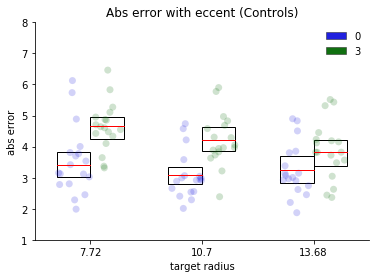

In [61]:
linares_plot(x='r_T', y='abs_err', hue='delay', hue_order=[0,3], order=[7.72,10.7,13.68], df=df_cont,palette=['b', 'g'], 
            alpha=0.2, point_size=7,  by_subj=True, subj_col='subject')
plt.legend(frameon=False)
plt.title('Abs error with eccent (Controls)')
plt.xlabel('target radius')
plt.ylabel('abs error')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.ylim(1, 8)
plt.show()

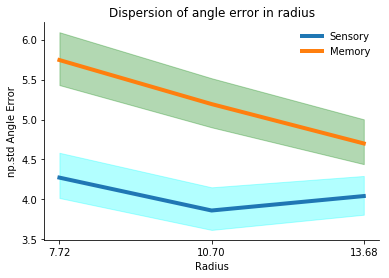

P_value in sensory =0.0548670902199699
P_value in memory =2.9951596403122897e-05
P_value in r1 =3.5135437017184864e-12
P_value in r2 =4.017809819872894e-12
P_value in r3 =0.0005859131128310996


In [84]:
from scikits.bootstrap import ci 

std_data_cont=[]
std_cont=[]
cis_cont=[]

std_data_cont3=[]
std_cont3=[]
cis_cont3=[]


for rad in [7.72, 10.7, 13.68]:
    std_data_cont.append(df_cont.loc[ (df_cont['r_T'] == rad) & ( df_cont['delay'] == 0 )].loc[:, 'A_err'].values)
    std_cont.append(df_cont.loc[ (df_cont['r_T'] == rad) & ( df_cont['delay'] == 0 )].loc[:, 'A_err'].std())
    cis_cont.append(ci(df_cont.loc[ (df_cont['r_T'] == rad) & ( df_cont['delay'] == 0 )].loc[:, 'A_err'].values, statfunction=np.std) )

    std_data_cont3.append(df_cont.loc[ (df_cont['r_T'] == rad) & ( df_cont['delay'] == 3 )].loc[:, 'A_err'].values)
    std_cont3.append(df_cont.loc[ (df_cont['r_T'] == rad) & ( df_cont['delay'] == 3 )].loc[:, 'A_err'].std())
    cis_cont3.append(ci(df_cont.loc[ (df_cont['r_T'] == rad) & ( df_cont['delay'] == 3 )].loc[:, 'A_err'].values, statfunction=np.std) )
    

plt.title('Dispersion of angle error in radius')
plt.plot(list(np.unique(df_cont.loc[:, 'r_T'])),  std_cont, linewidth = 4, label = 'Sensory')
plt.fill_between(list(np.unique(df_cont.loc[:, 'r_T'])), np.array(cis_cont)[:,0], np.array(cis_cont)[:,1],color="cyan",alpha=0.3)

# pallete=sns.blend_palette(['cyan', 'm'], 2)
# for i in range(len(  list(np.unique(df_cont.loc[:, 'r_T']))    )-1):
#     plt.fill_between(list(np.unique(df_cont.loc[:, 'r_T']))[i:i+2], np.array(cis_cont)[:,0][i:i+2], np.array(cis_cont)[:,1][i:i+2],  color=pallete[i]     ,alpha=0.3)

    

plt.plot(list(np.unique(df_cont.loc[:, 'r_T'])), std_cont3, linewidth = 4, label='Memory')
plt.fill_between(list(np.unique(df_cont.loc[:, 'r_T'])), np.array(cis_cont3)[:,0], np.array(cis_cont3)[:,1],color="g",alpha=0.3)


# pallete=sns.blend_palette(['cyan', 'm'], 2)
# for i in range(len(  list(np.unique(df_cont.loc[:, 'r_T']))   )-1):
#     plt.fill_between(list(np.unique(df_cont.loc[:, 'r_T']))[i:i+2], np.array(cis_cont3)[:,0][i:i+2], np.array(cis_cont3)[:,1][i:i+2],  color=pallete[i]     ,alpha=0.3)

    

plt.xlabel('Radius')
plt.ylabel('np.std Angle Error')

plt.xticks(list(np.unique(df_cont.loc[:, 'r_T'])))
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()


print('P_value in sensory =' + str(scipy.stats.bartlett(std_data_cont[0], std_data_cont[1], std_data_cont[2])[1]))
print('P_value in memory =' + str(scipy.stats.bartlett(std_data_cont3[0], std_data_cont3[1], std_data_cont3[2])[1]))

print('P_value in r1 =' + str(scipy.stats.bartlett(std_data_cont[0], std_data_cont3[0])[1]))
print('P_value in r2 =' + str(scipy.stats.bartlett(std_data_cont[1], std_data_cont3[1])[1]))
print('P_value in r3 =' + str(scipy.stats.bartlett(std_data_cont[2], std_data_cont3[2])[1]))


## Radial interference

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2387
Outliers in 1 = 4, limit=3.17cm
Outliers in 2 = 4, limit=2.56cm
Outliers in 3 = 8, limit=2.85cm
Outliers in 4 = 1, limit=3.02cm
Outliers in 5 = 8, limit=2.64cm
Outliers in 6 = 5, limit=4.05cm
Outliers in 7 = 6, limit=2.61cm
Outliers in 8 = 5, limit=2.35cm
Outliers in 9 = 5, limit=3.27cm
Outliers in 10 = 4, limit=3.38cm
Outliers in 11 = 1, limit=3.49cm
Outliers in 12 = 6, limit=3.65cm
Outliers in 13 = 8, limit=2.4cm
Outliers in 14 = 6, limit=3.07cm
Outliers in 15 = 3, limit=3.22cm
Outliers in 16 = 9, limit=3.51cm
Outliers in 17 = 9, limit=2.81cm
Outliers in 18 = 4, limit=3.53cm
2291


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


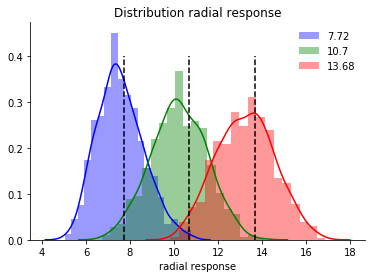

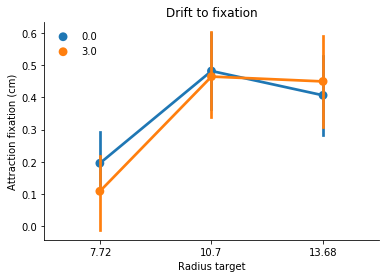

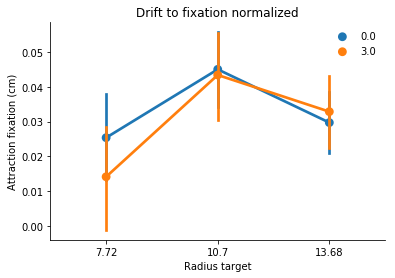

In [64]:
dfr=data.loc[(data['type']==3) | (data['type']==4)]

in_out=[]
### in --> the target is closer to fixation
### out --> the target is far from fixation

for i in dfr.index:
    if dfr.loc[i, 'r_T']<dfr.loc[i, 'r_NT']:
        in_out.append('in')
    else:
        in_out.append('out')


dfr['in_out'] = in_out


print(len(dfr))

def mod(target,report,radius_t, radius_r):
    #units given in degrees and cm
    y_t=np.array(radius_t*np.sin(np.radians(target)),dtype=np.float)
    x_t=np.array(radius_t*np.cos(np.radians(target)),dtype=np.float)
    y_r=np.array(radius_r*np.sin(np.radians(report)),dtype=np.float)
    x_r=np.array(radius_r*np.cos(np.radians(report)),dtype=np.float)
    m = np.sqrt((x_t - x_r)**2 + (y_t - y_r)**2)
    return m


modules = [round(mod(dfr.loc[i,'A_T'], dfr.loc[i,'A_R'], dfr.loc[i,'r_T'], dfr.loc[i,'r_R']),3) for i in dfr.index]
dfr['modules']=modules


from pandas import concat
frames=[]
for group_label in dfr.subject.unique():
    sub_group=dfr.groupby('subject').get_group(group_label)
    #CI
    #interval = sub_group.quantile([0.025, 0.975]).unstack(level=1)['A_err']
    #removed_out = sub_group.loc[(sub_group['A_err']>interval.iloc[0]) & (sub_group['A_err']<interval.iloc[1])] 
    #
    #Quartiles
    limit=sub_group['modules'].mean() + 2*sub_group['modules'].std()
    #print(round(limit,2))
    removed_out =sub_group.loc[sub_group['modules']<limit  ]
    
    
    frames.append(removed_out)
    
    #Print the result
    before_outliers=len(sub_group)
    after_outliers=len(removed_out)
    print( 'Outliers in ' + str(group_label) + ' = ' +str(before_outliers-after_outliers) + ', limit=' +str(round(limit,2))  + 'cm')
    


dfr = concat(frames)
print(len(dfr))

### Distribution A_Err in cw-ccw
sns.distplot(dfr.loc[ dfr['r_T']==7.72, 'r_R'], color='b', label='7.72')
sns.distplot(dfr.loc[ dfr['r_T']==10.7, 'r_R'], color='g', label='10.7')
sns.distplot(dfr.loc[ dfr['r_T']==13.68, 'r_R'], color='r', label='13.68')
plt.title('Distribution radial response')
plt.legend(frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('radial response')

plt.plot([7.72, 7.72], [0, 0.4], 'k--')
plt.plot([10.7, 10.7], [0, 0.4], 'k--')
plt.plot([13.68, 13.68], [0, 0.4], 'k--')
plt.show()

sns.pointplot(x='r_T', y='r_err', hue='delay', x_estimator=np.mean, legend=False, data=dfr)
plt.legend(frameon=False)
plt.title('Drift to fixation')
plt.xlabel('Radius target')
plt.ylabel('Attraction fixation (cm)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()



dfr['drift_norm'] = dfr['r_err']  / dfr['r_T']
sns.pointplot(x='r_T', y='drift_norm', hue='delay', x_estimator=np.mean, legend=False, data=dfr)
plt.legend(frameon=False)
plt.title('Drift to fixation normalized')
plt.xlabel('Radius target')
plt.ylabel('Attraction fixation (cm)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show()

In [65]:
##### DISTANCE TO MEAN OF CW AND CCW as a measure
means_in={}

for Subj in dfr.subject.unique():
    d_subj = dfr.groupby('subject').get_group(Subj)
    for p1 in dfr.r_T.unique():
        for p2 in dfr.r_T.unique():
            for delay in dfr.delay.unique():
                mean_in = round(d_subj.loc[ (d_subj['r_T']==p1)  & (d_subj['r_NT']==p2)
                                               & (d_subj['delay']==delay) ,'r_err'].mean(), 3)
                
                means_in[str(Subj)  + '_' + str(p1) + '_' +str(p2) +'_'+ str(delay)] = mean_in

In [66]:
in_out_distance=[]

for i in dfr.index:
    or_ = dfr.loc[i, 'in_out']
    idx =  str(dfr.loc[i, 'subject'])+ '_' + str(dfr.loc[i, 'r_NT']) + '_' +str(dfr.loc[i, 'r_T']) +'_' +str(dfr.loc[i, 'delay'])
    #
    if or_ == 'out':
        in_out_distance.append(dfr.loc[i, 'r_err'] - means_in[idx])  
    elif or_ =='in':
        in_out_distance.append(means_in[idx] - dfr.loc[i, 'r_err'])  
    else:
        print('Error')
    


dfr['in_out_distance'] = np.array(in_out_distance)/2


In [67]:
d3_d0=[]

for i in dfr.index:
    or_ = dfr.loc[i, 'in_out']
    idx =  str(dfr.loc[i, 'subject'])+ '_' + str(dfr.loc[i, 'r_T']) + '_' +str(dfr.loc[i, 'r_NT']) +'_0.0'
    #
    if or_ == 'out':
        d3_d0.append(dfr.loc[i, 'r_err'] - means_in[idx])  
    elif or_ =='in':
        d3_d0.append(means_in[idx] - dfr.loc[i, 'r_err'])  
    else:
        print('Error')
    


dfr['d3_d0'] = np.array(d3_d0)/2

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


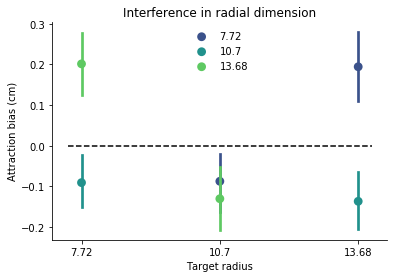

In [68]:
## Perception

sns.pointplot(x='r_T', y='in_out_distance',  hue='r_NT', hue_order=[7.72, 10.7, 13.68], ci=95, 
              estimator=np.mean, palette='viridis', legend=False, data=dfr.loc[dfr['delay']==0], join=False)

plt.legend(frameon=False)
plt.title('Interference in radial dimension')
plt.xlabel('Target radius')
plt.ylabel('Attraction bias (cm)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.plot([-0.1,2.1], [0,0], 'k--')
plt.gca().get_yaxis().tick_left()
plt.show()




C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


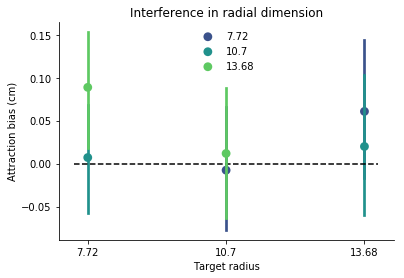

In [69]:
## Memory
sns.pointplot(x='r_T', y='d3_d0',  hue='r_NT', hue_order=[7.72, 10.7, 13.68], ci=95, 
              estimator=np.mean, palette='viridis', legend=False, data=dfr.loc[dfr['delay']==3], join=False)

plt.legend(frameon=False)
plt.title('Interference in radial dimension')
plt.xlabel('Target radius')
plt.ylabel('Attraction bias (cm)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.plot([-0.1,2.1], [0,0], 'k--')
plt.gca().get_yaxis().tick_left()
plt.show()

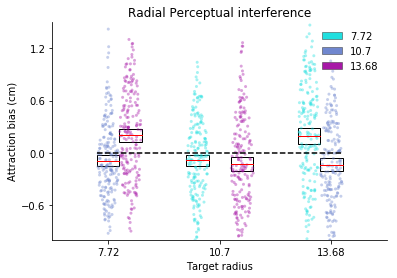

In [70]:
## Perception

r_pallete=sns.blend_palette(['cyan', 'm'], 3)
r_pallete= np.array( [r_pallete[i][:3] for i in range(len(r_pallete))] )

linares_plot(x='r_T', y='in_out_distance',  hue='r_NT', hue_order=[7.72, 10.7, 13.68], order = [7.72, 10.7, 13.68],
             palette=r_pallete, df=dfr.loc[dfr['delay']==0], point_size=3, alpha=0.4, statistic=np.mean)

plt.legend(frameon=False)
plt.title('Radial Perceptual interference')
plt.xlabel('Target radius')
plt.ylabel('Attraction bias (cm)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.plot([-0.1,2.1], [0,0], 'k--')
plt.gca().get_yaxis().tick_left()
plt.ylim(-1,1.5)
plt.yticks([-0.6, 0,  0.6,  1.2]);
plt.show()

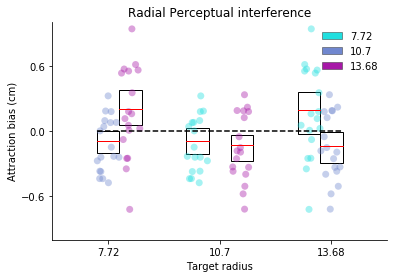

In [71]:

linares_plot(x='r_T', y='in_out_distance',  hue='r_NT', hue_order=[7.72, 10.7, 13.68], order = [7.72, 10.7, 13.68],
             palette=r_pallete, df=dfr.loc[dfr['delay']==0], alpha=0.4, statistic=np.mean, by_subj=True, subj_col='subject', point_size=7 )

plt.legend(frameon=False)
plt.title('Radial Perceptual interference')
plt.xlabel('Target radius')
plt.ylabel('Attraction bias (cm)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.plot([-0.1,2.1], [0,0], 'k--')
plt.gca().get_yaxis().tick_left()
plt.ylim(-1,1)
plt.yticks([-0.6, 0,  0.6]);
plt.show()

In [72]:
#### MODEL
res_m = smf.mixedlm(formula='in_out_distance ~ r_T * r_NT', data=dfr.loc[dfr['delay']==0], groups=dfr.loc[dfr['delay']==0, 'subject']).fit()
print(res_m.summary())

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: in_out_distance
No. Observations: 1172    Method:             REML           
No. Groups:       18      Scale:              0.2145         
Min. group size:  24      Likelihood:         -802.1824      
Max. group size:  94      Converged:          Yes            
Mean group size:  65.1                                       
--------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept     -3.980     0.404   -9.847  0.000  -4.772  -3.188
r_T            0.366     0.035   10.372  0.000   0.297   0.435
r_NT           0.366     0.035   10.392  0.000   0.297   0.435
r_T:r_NT      -0.035     0.003  -10.765  0.000  -0.041  -0.029
Group Var      0.078     0.061                                



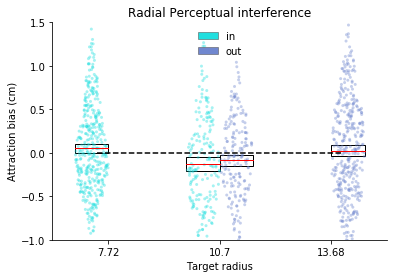

In [73]:
linares_plot(x='r_T', y='in_out_distance',  hue='in_out', hue_order=['in', 'out'], order = [7.72, 10.7, 13.68],
             palette=r_pallete, df=dfr.loc[dfr['delay']==0], point_size=3, alpha=0.4, statistic=np.mean)

plt.legend(frameon=False)
plt.title('Radial Perceptual interference')
plt.xlabel('Target radius')
plt.ylabel('Attraction bias (cm)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.plot([-0.1,2.1], [0,0], 'k--')
plt.gca().get_yaxis().tick_left()
plt.ylim(-1,1.5)
plt.show()

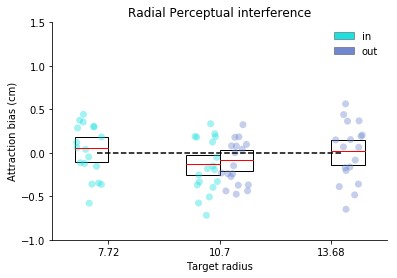

In [74]:
linares_plot(x='r_T', y='in_out_distance',  hue='in_out', hue_order=['in', 'out'], order = [7.72, 10.7, 13.68],
             palette=r_pallete, df=dfr.loc[dfr['delay']==0], point_size=7, alpha=0.4, statistic=np.mean,
             by_subj=True, subj_col='subject' )

plt.legend(frameon=False)
plt.title('Radial Perceptual interference')
plt.xlabel('Target radius')
plt.ylabel('Attraction bias (cm)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.plot([-0.1,2.1], [0,0], 'k--')
plt.gca().get_yaxis().tick_left()
plt.ylim(-1,1.5)
plt.show()

In [75]:
#### MODEL
res_m = smf.mixedlm(formula='in_out_distance ~ r_T * in_out', data=dfr.loc[dfr['delay']==0], groups=dfr.loc[dfr['delay']==0, 'subject']).fit()
print(res_m.summary())

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: in_out_distance
No. Observations: 1172    Method:             REML           
No. Groups:       18      Scale:              0.2308         
Min. group size:  24      Likelihood:         -840.5509      
Max. group size:  94      Converged:          Yes            
Mean group size:  65.1                                       
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           0.510    0.140  3.632 0.000  0.235  0.785
in_out[T.out]      -1.059    0.220 -4.825 0.000 -1.489 -0.629
r_T                -0.063    0.014 -4.468 0.000 -0.090 -0.035
r_T:in_out[T.out]   0.103    0.020  5.159 0.000  0.064  0.142
Group Var           0.078    0.059                           



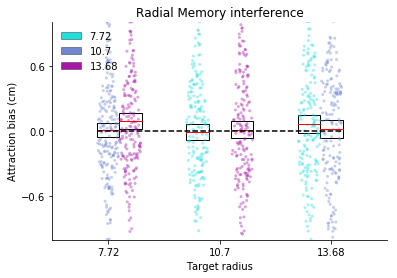

In [76]:
## Memory
linares_plot(x='r_T', y='d3_d0',  hue='r_NT', hue_order=[7.72, 10.7, 13.68], order = [7.72, 10.7, 13.68],
             palette=r_pallete,  df=dfr.loc[dfr['delay']==3], point_size=3, statistic=np.mean)

plt.legend(frameon=False)
plt.title('Radial Memory interference')
plt.xlabel('Target radius')
plt.ylabel('Attraction bias (cm)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.plot([-0.1,2.1], [0,0], 'k--')
plt.gca().get_yaxis().tick_left()
plt.ylim(-1,1)
plt.yticks([-0.6, 0,  0.6]);
plt.show()

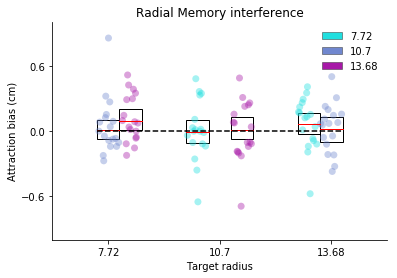

In [77]:
linares_plot(x='r_T', y='d3_d0',  hue='r_NT', hue_order=[7.72, 10.7, 13.68], order = [7.72, 10.7, 13.68],
             palette=r_pallete,  df=dfr.loc[dfr['delay']==3], statistic=np.mean,
             by_subj=True, subj_col='subject', point_size=7 )

plt.legend(frameon=False)
plt.title('Radial Memory interference')
plt.xlabel('Target radius')
plt.ylabel('Attraction bias (cm)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.plot([-0.1,2.1], [0,0], 'k--')
plt.gca().get_yaxis().tick_left()
plt.ylim(-1,1)
plt.yticks([-0.6, 0,  0.6]);
plt.show()

In [78]:
#### MODEL
res_m = smf.mixedlm(formula='d3_d0 ~ r_T * r_NT', data=dfr.loc[dfr['delay']==3], groups=dfr.loc[dfr['delay']==3, 'subject']).fit()
print(res_m.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: d3_d0    
No. Observations: 1119    Method:             REML     
No. Groups:       18      Scale:              0.2736   
Min. group size:  19      Likelihood:         -876.5555
Max. group size:  90      Converged:          Yes      
Mean group size:  62.2                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    -0.915    0.458 -1.996 0.046 -1.813 -0.016
r_T           0.082    0.041  2.009 0.045  0.002  0.161
r_NT          0.085    0.041  2.101 0.036  0.006  0.165
r_T:r_NT     -0.008    0.004 -2.016 0.044 -0.015 -0.000
Group Var     0.000    0.004                           



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


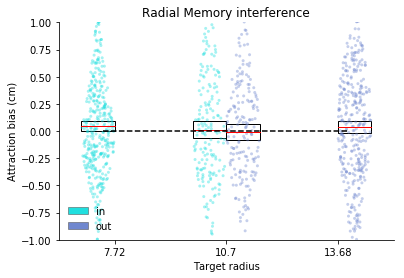

In [79]:
linares_plot(x='r_T', y='d3_d0',  hue='in_out', hue_order=['in', 'out'], order = [7.72, 10.7, 13.68],
             palette=r_pallete,  df=dfr.loc[dfr['delay']==3], point_size=3, statistic=np.mean)

plt.legend(frameon=False)
plt.title('Radial Memory interference')
plt.xlabel('Target radius')
plt.ylabel('Attraction bias (cm)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.plot([-0.1,2.1], [0,0], 'k--')
plt.gca().get_yaxis().tick_left()
plt.ylim(-1,1)
plt.show()

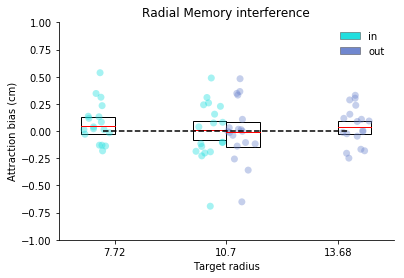

In [80]:
linares_plot(x='r_T', y='d3_d0',  hue='in_out', hue_order=['in', 'out'], order = [7.72, 10.7, 13.68],
             palette=r_pallete,  df=dfr.loc[dfr['delay']==3], statistic=np.mean,
             by_subj=True, subj_col='subject', point_size=7)

plt.legend(frameon=False)
plt.title('Radial Memory interference')
plt.xlabel('Target radius')
plt.ylabel('Attraction bias (cm)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.plot([-0.1,2.1], [0,0], 'k--')
plt.gca().get_yaxis().tick_left()
plt.ylim(-1,1)
plt.show()

In [81]:
#### MODEL
res_m = smf.mixedlm(formula='d3_d0 ~ r_T * in_out', data=dfr.loc[dfr['delay']==3], groups=dfr.loc[dfr['delay']==3, 'subject']).fit()
print(res_m.summary())

           Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  d3_d0    
No. Observations:    1119     Method:              REML     
No. Groups:          18       Scale:               0.2742   
Min. group size:     19       Likelihood:          -874.1660
Max. group size:     90       Converged:           Yes      
Mean group size:     62.2                                   
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept          0.138    0.139  0.997 0.319 -0.134  0.410
in_out[T.out]     -0.318    0.244 -1.307 0.191 -0.796  0.159
r_T               -0.012    0.016 -0.749 0.454 -0.043  0.019
r_T:in_out[T.out]  0.028    0.022  1.253 0.210 -0.016  0.072
Group Var          0.000    0.004                           



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


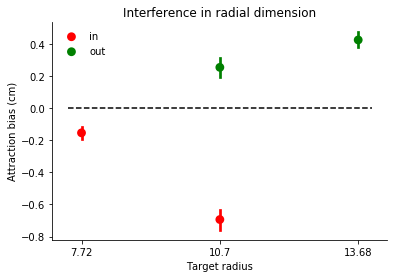

In [82]:
sns.pointplot(x='r_T', y='Int_r_err', hue='in_out', hue_order=['in', 'out'], ci=68, 
              estimator=np.mean, palette=['r', 'g'], legend=False, data=dfr, join=False)

plt.legend(frameon=False)
plt.title('Interference in radial dimension')
plt.xlabel('Target radius')
plt.ylabel('Attraction bias (cm)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.plot([-0.1,2.1], [0,0], 'k--')
plt.gca().get_yaxis().tick_left()
plt.show()



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


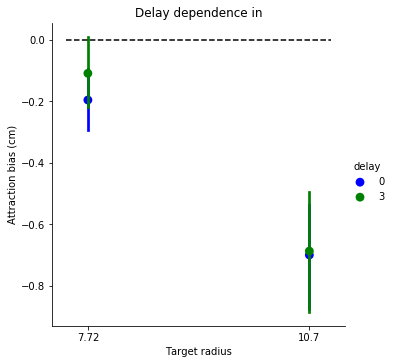

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


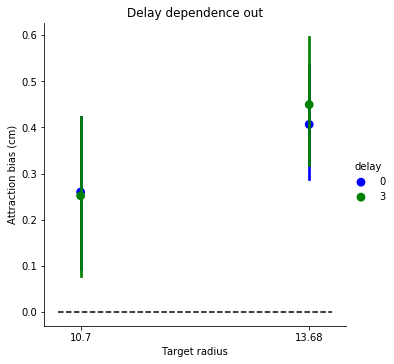

In [83]:
### Delay component

sns.factorplot(x='r_T', y='Int_r_err', hue='delay', hue_order=[0, 3], palette=['b','g'], data=dfr.loc[dfr['in_out']=='in'], join=False)
plt.title('Delay dependence in')
plt.xlabel('Target radius')
plt.ylabel('Attraction bias (cm)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.plot([-0.1,1.1], [0,0], 'k--')
plt.gca().get_yaxis().tick_left()
plt.show()

sns.factorplot(x='r_T', y='Int_r_err', hue='delay', hue_order=[0, 3], palette=['b','g'],  data=dfr.loc[dfr['in_out']=='out'], join=False)
plt.title('Delay dependence out')
plt.xlabel('Target radius')
plt.ylabel('Attraction bias (cm)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.plot([-0.1,1.1], [0,0], 'k--')
plt.gca().get_yaxis().tick_left()
plt.show()
